# BHANU PRATAP REDDY - 11/12/2022

## Library Imports and QoL Settings

In [451]:
#Importing all necessary Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pnx
import scipy.stats as stats
from sklearn.impute import SimpleImputer

# For checking errors
from sklearn import metrics

# For preprocessing the data
from sklearn import preprocessing

#For EDA
from sci_analysis import analyze

#For Scaling the dataset
from scipy.stats import zscore

#Train -  Test Split
from sklearn.model_selection import train_test_split

#Libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

#Libraries for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.datasets import load_spam

#ADA boost
from sklearn.ensemble import AdaBoostClassifier

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#Decision Treee
from sklearn import tree

#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#AUC and Confusion Matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#Librares for Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn_evaluation import plot

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

#For KNN
from sklearn.neighbors import KNeighborsClassifier

#for Text Mining
import re 
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import WordNetLemmatizer
import nltk 
from nltk.corpus import inaugural
from nltk.draw.dispersion import dispersion_plot

# Declaring this to show graphs after inline command instead of plt.show() after every instance of plotting
%matplotlib inline

#Set the max number of rows in output cell to 30
pd.options.display.max_rows = 30


#Ignore unnecessary warnings
from warnings import filterwarnings
filterwarnings("ignore")

## Machine Learning & Ensemble 

In [452]:
ml_xls = pd.ExcelFile("D:\Visual Studio Projects\Python\Great Learning Data Science\Datasets\Election_Data.xlsx")
ml_df = pd.read_excel(ml_xls,"Election_Dataset_Two Classes")
ml_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [453]:
ml_df.shape

(1525, 10)

### Data Dictionary

**Election measures used:**

**Vote** - Party choice: Conservative or Labour

**age** - age in years

**economic.cond.household** - Assessment of current household economic conditions, 1 to 5.

**Blair** - Assessment of the Labour leader, 1 to 5.

**Hague** - Assessment of the Conservative leader, 1 to 5.

**Europe** - An 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

**political.knowledge** -  Knowledge of parties' positions on European integration, 0 to 3.

**gender** - female or male.


In [454]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [455]:
ml_df.drop('Unnamed: 0',axis=1,inplace=True)
ml_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [456]:
ml_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style='color:red'> THEY ARE NOT DUPLICATED! All values seem to be unique. </span>

In [457]:
ml_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [458]:
ml_df.isin([0]).sum()

vote                         0
age                          0
economic.cond.national       0
economic.cond.household      0
Blair                        0
Hague                        0
Europe                       0
political.knowledge        455
gender                       0
dtype: int64

In [459]:
ml_df.duplicated().value_counts()

False    1517
True        8
dtype: int64

In [460]:
ml_df[ml_df.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [461]:
ml_df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [462]:
# for col in ['vote', 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']:
#     ml_df[col] = ml_df[col].astype('category')

for col in ['vote', 'political.knowledge', 'gender']:
    ml_df[col] = ml_df[col].astype('category')

In [463]:
ml_df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
dtype: float64

In [464]:
ml_df.age.dtype

dtype('int64')

In [465]:
cat=[]
num=[]
for i in ml_df.columns:
    if ml_df[i].dtype=="int64":
        num.append(i)
    else:
        cat.append(i)
print(cat) 
print(num)

['vote', 'political.knowledge', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe']


In [466]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   category
 1   age                      1525 non-null   int64   
 2   economic.cond.national   1525 non-null   int64   
 3   economic.cond.household  1525 non-null   int64   
 4   Blair                    1525 non-null   int64   
 5   Hague                    1525 non-null   int64   
 6   Europe                   1525 non-null   int64   
 7   political.knowledge      1525 non-null   category
 8   gender                   1525 non-null   category
dtypes: category(3), int64(6)
memory usage: 76.5 KB


Distribution of vote


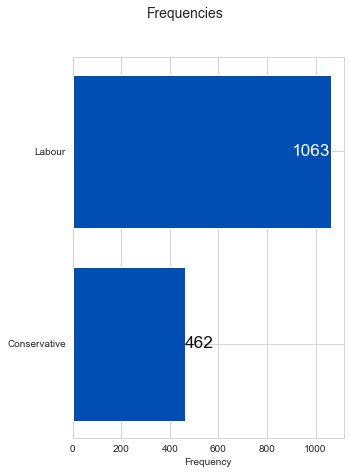



Overall Statistics
------------------

Total            =  1525
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             1063           69.7049      Labour        
2             462            30.2951      Conservative  
Distribution of age


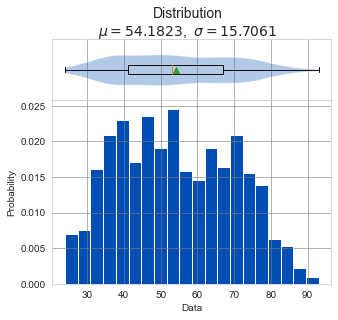



Statistics
----------

n         =  1525
Mean      =  54.1823
Std Dev   =  15.7061
Std Error =  0.4022
Skewness  =  0.1445
Kurtosis  = -0.9477
Maximum   =  93.0000
75%       =  67.0000
50%       =  53.0000
25%       =  41.0000
Minimum   =  24.0000
IQR       =  26.0000
Range     =  69.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9757
p value =  0.0000

HA: Data is not normally distributed

Distribution of economic.cond.national


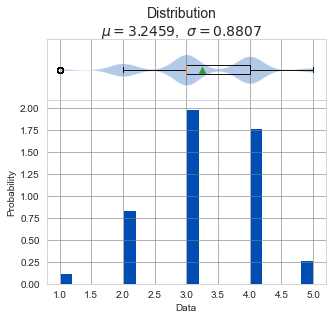



Statistics
----------

n         =  1525
Mean      =  3.2459
Std Dev   =  0.8807
Std Error =  0.0226
Skewness  = -0.2402
Kurtosis  = -0.2591
Maximum   =  5.0000
75%       =  4.0000
50%       =  3.0000
25%       =  3.0000
Minimum   =  1.0000
IQR       =  1.0000
Range     =  4.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8851
p value =  0.0000

HA: Data is not normally distributed

Distribution of economic.cond.household


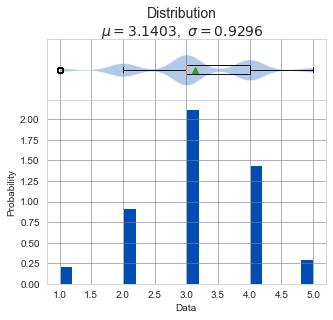



Statistics
----------

n         =  1525
Mean      =  3.1403
Std Dev   =  0.9296
Std Error =  0.0238
Skewness  = -0.1494
Kurtosis  = -0.2096
Maximum   =  5.0000
75%       =  4.0000
50%       =  3.0000
25%       =  3.0000
Minimum   =  1.0000
IQR       =  1.0000
Range     =  4.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8983
p value =  0.0000

HA: Data is not normally distributed

Distribution of Blair


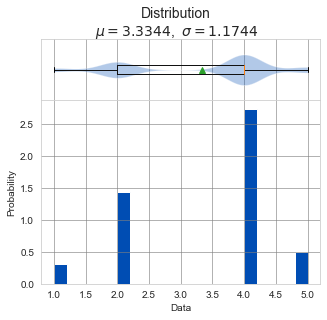



Statistics
----------

n         =  1525
Mean      =  3.3344
Std Dev   =  1.1744
Std Error =  0.0301
Skewness  = -0.5349
Kurtosis  = -1.0660
Maximum   =  5.0000
75%       =  4.0000
50%       =  4.0000
25%       =  2.0000
Minimum   =  1.0000
IQR       =  2.0000
Range     =  4.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7875
p value =  0.0000

HA: Data is not normally distributed

Distribution of Hague


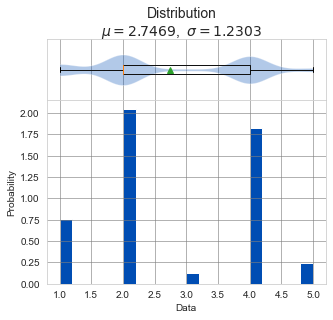



Statistics
----------

n         =  1525
Mean      =  2.7469
Std Dev   =  1.2303
Std Error =  0.0315
Skewness  =  0.1519
Kurtosis  = -1.3911
Maximum   =  5.0000
75%       =  4.0000
50%       =  2.0000
25%       =  2.0000
Minimum   =  1.0000
IQR       =  2.0000
Range     =  4.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8277
p value =  0.0000

HA: Data is not normally distributed

Distribution of Europe


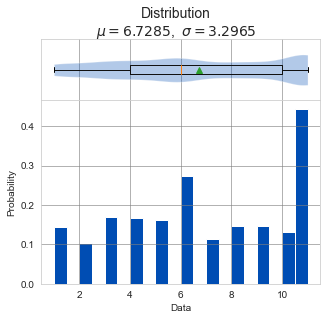



Statistics
----------

n         =  1525
Mean      =  6.7285
Std Dev   =  3.2965
Std Error =  0.0844
Skewness  = -0.1358
Kurtosis  = -1.2377
Maximum   =  11.0000
75%       =  10.0000
50%       =  6.0000
25%       =  4.0000
Minimum   =  1.0000
IQR       =  6.0000
Range     =  10.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9149
p value =  0.0000

HA: Data is not normally distributed

Distribution of political.knowledge


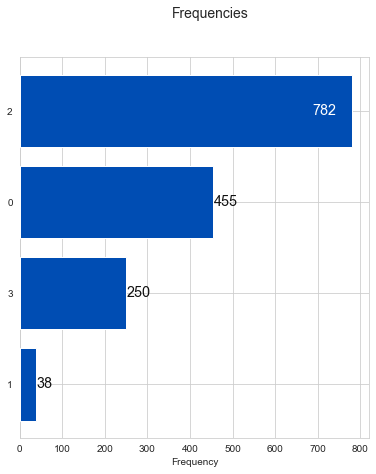



Overall Statistics
------------------

Total            =  1525
Number of Groups =  4


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             782            51.2787      2             
2             455            29.8361      0             
3             250            16.3934      3             
4             38             2.4918       1             
Distribution of gender


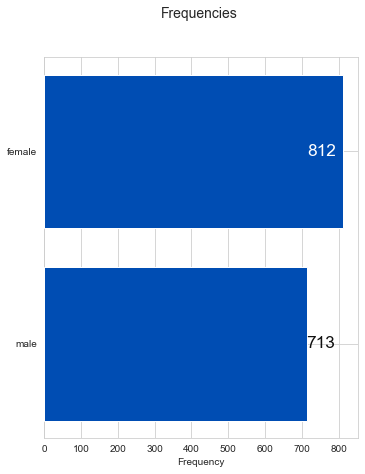



Overall Statistics
------------------

Total            =  1525
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             812            53.2459      female        
2             713            46.7541      male          


In [467]:
for col in ml_df.columns:
    if ml_df[col].dtype != "object":
        print(f"Distribution of {col}")
        analyze(ml_df[col])

In [468]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe']


Text(0, 0.5, 'Age')

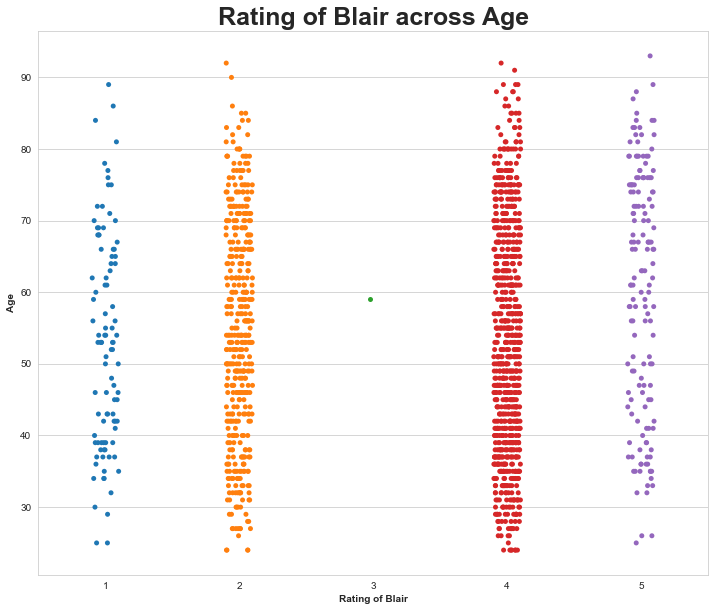

In [469]:
plt.figure(figsize=(12,10))
plt.title("Rating of Blair across Age",fontsize=25, weight="bold")
sns.set_style('whitegrid')

sns.stripplot(ml_df["Blair"], ml_df['age'], jitter=True) 
plt.xlabel('Rating of Blair',fontsize=10, weight="bold")
plt.ylabel('Age',fontsize=10, weight="bold")


Text(0, 0.5, 'Age')

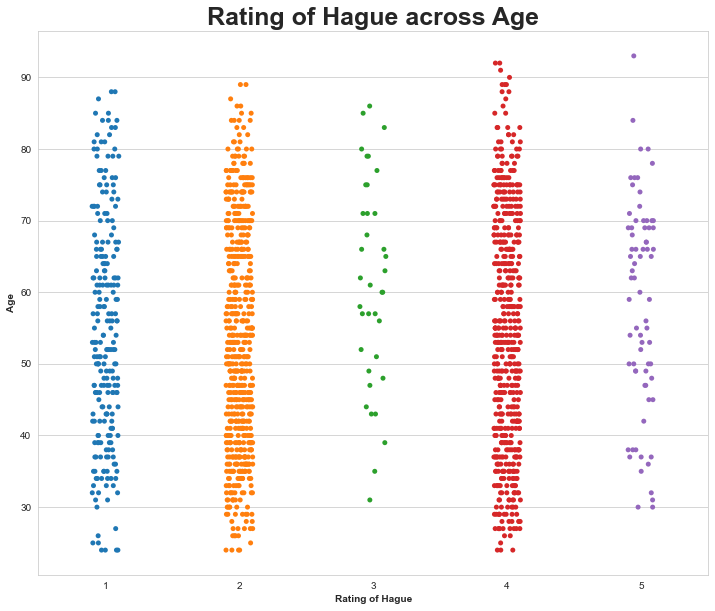

In [470]:
plt.figure(figsize=(12,10))
plt.title("Rating of Hague across Age",fontsize=25, weight="bold")
sns.set_style('whitegrid')

sns.stripplot(ml_df["Hague"], ml_df['age'], jitter=True) 
plt.xlabel('Rating of Hague',fontsize=10, weight="bold")
plt.ylabel('Age',fontsize=10, weight="bold")

Text(0.5, 0, 'Europe Rating')

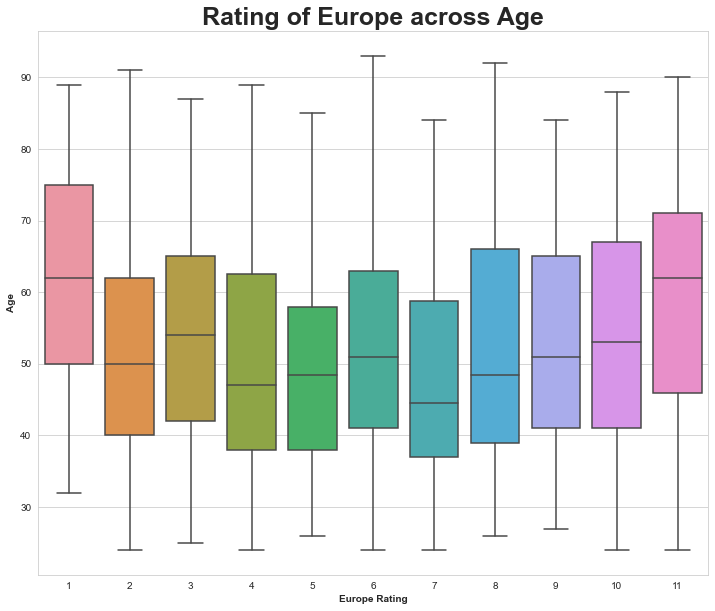

In [471]:
plt.figure(figsize=(12,10))
plt.title("Rating of Europe across Age",fontsize=25, weight="bold")
sns.set_style('whitegrid')

sns.boxplot(ml_df["Europe"], ml_df['age']) 
plt.ylabel('Age',fontsize=10, weight="bold")
plt.xlabel('Europe Rating',fontsize=10, weight="bold")

Text(0, 0.5, 'Age')

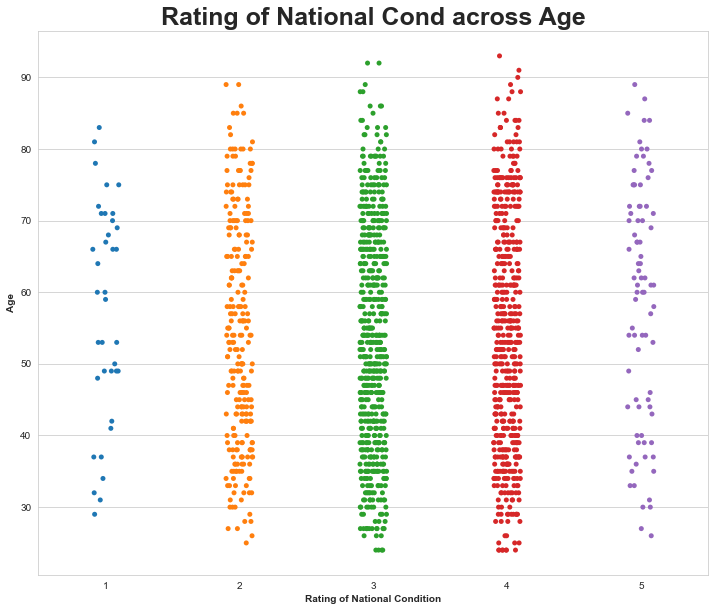

In [472]:
plt.figure(figsize=(12,10))
plt.title("Rating of National Cond across Age",fontsize=25, weight="bold")
sns.set_style('whitegrid')

sns.stripplot(ml_df["economic.cond.national"], ml_df['age'], jitter=True) 
plt.xlabel('Rating of National Condition',fontsize=10, weight="bold")
plt.ylabel('Age',fontsize=10, weight="bold")

Text(0, 0.5, 'Age')

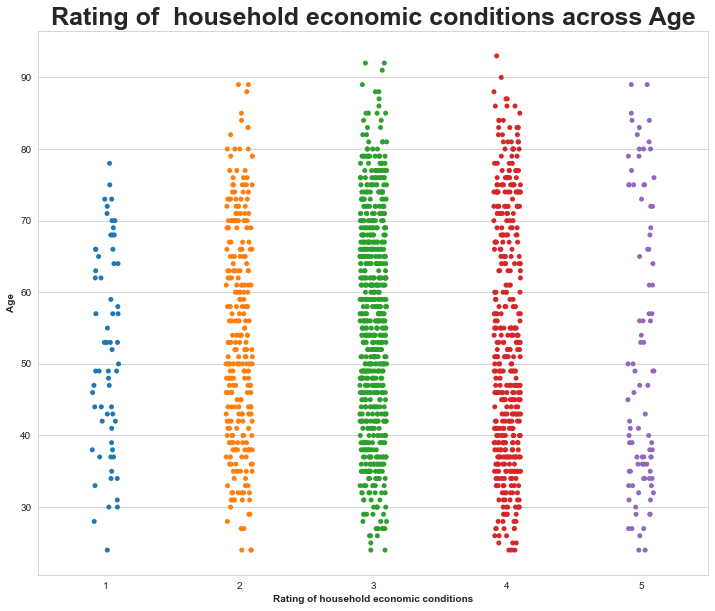

In [473]:
plt.figure(figsize=(12,10))
plt.title("Rating of  household economic conditions across Age",fontsize=25, weight="bold")
sns.set_style('whitegrid')

sns.stripplot(ml_df["economic.cond.household"], ml_df['age'], jitter=True) 
plt.xlabel('Rating of household economic conditions',fontsize=10, weight="bold")
plt.ylabel('Age',fontsize=10, weight="bold")

In [474]:
ml_df.vote.value_counts(normalize = True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [475]:
ml_df_tmp = ml_df.copy(deep=True)

In [476]:
ml_df["age"] = zscore(ml_df["age"])
ml_df["economic.cond.national"] = zscore(ml_df["economic.cond.national"])
ml_df["economic.cond.household"] = zscore(ml_df["economic.cond.household"])
ml_df["Blair"] = zscore(ml_df["Blair"])
ml_df["Hague"] = zscore(ml_df["Hague"])
ml_df["Europe"] = zscore(ml_df["Europe"])


In [477]:
ml_df_dummy = pd.get_dummies(ml_df,drop_first=True)
ml_df_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,vote_Labour,political.knowledge_1,political.knowledge_2,political.knowledge_3,gender_male
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,1,0,1,0,0
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,1,0,1,0,1
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,1,0,1,0,1
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,1,0,0,0,0
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,1,0,1,0,1


In [478]:
# Copy all the predictor variables into X dataframe
x = ml_df_dummy.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = ml_df_dummy['vote_Labour']

In [479]:
# Split X and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=0,stratify=ml_df_dummy['vote_Labour'])

In [480]:
# Checking the raito of dependent variable from train
y_train.value_counts(normalize = True)

1    0.697282
0    0.302718
Name: vote_Labour, dtype: float64

In [481]:
# Checking the raito of dependent variable from test
y_test.value_counts(normalize = True)

1    0.696507
0    0.303493
Name: vote_Labour, dtype: float64

### Logistic regression Model

In [482]:
# Fit the Logistic Regression model
logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
logistic_model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [483]:
#Predicted Classes
ytrain_predict_lr = logistic_model.predict(x_train)
ytest_predict_lr = logistic_model.predict(x_test)

In [484]:
#Predict Probability
ytest_predict_prob_lr = logistic_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob_lr).head()

,0,1
0,0.063690,0.936310
1,0.711274,0.288726
2,0.124319,0.875681
3,0.087333,0.912667
4,0.080649,0.919351


In [485]:
#Accuracy - Train Data
print(f"The Accuracy score (Train data) is {round(logistic_model.score(x_train,y_train),4)}")

# Accuracy - Test Data
print(f"The Accuracy score (Test data) is {round(logistic_model.score(x_test, y_test),4)}")

The Accuracy score (Train data) is 0.8379
The Accuracy score (Test data) is 0.8253


AUC for the Training Data: 0.896
AUC for the Test Data: 0.874


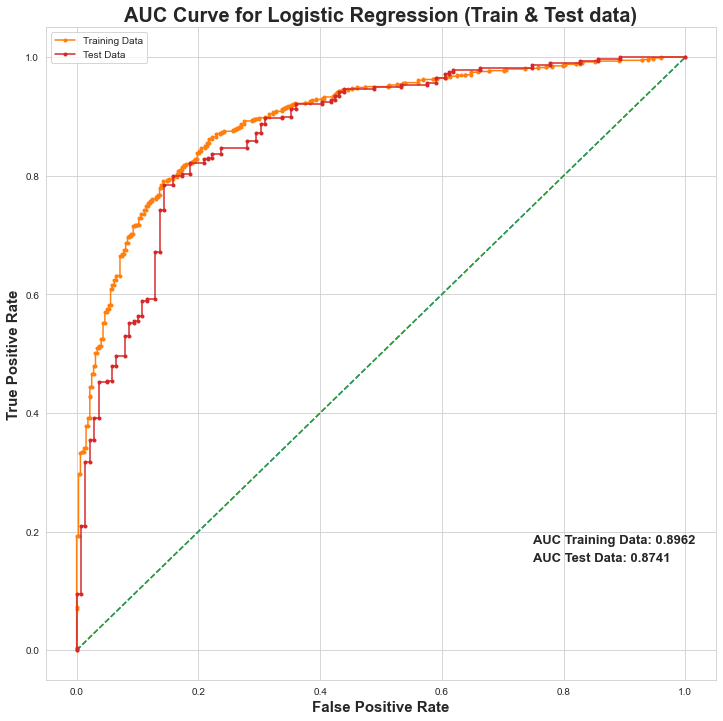

In [486]:
#Train Data Plot
# predict probabilities
probs_train = logistic_model.predict_proba(x_train)

# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)
sns.set_style('whitegrid')

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label = 'Training Data');



#Test Data Plot
# predict probabilities
probs_test = logistic_model.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label='Test Data');


plt.title("AUC Curve for Logistic Regression (Train & Test data)",fontsize=20, weight="bold");
plt.xlabel("False Positive Rate",fontsize=15,weight="bold")
plt.ylabel("True Positive Rate",fontsize=15,weight="bold")
plt.legend(loc='best')
plt.text(0.75,0.18,f'AUC Training Data: {round(auc_train,4)}',fontsize=13, weight="bold")
plt.text(0.75,0.15,f'AUC Test Data: {round(auc_test,4)}',fontsize=13, weight="bold")
plt.show()


In [487]:
# Performance measures using Classification report on training set
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict_lr,digits=4))

# Performance measures using Classification report on Test set
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict_lr,digits=4))

Classification Report of the training data:

               precision    recall  f1-score   support

           0     0.7604    0.6780    0.7169       323
           1     0.8665    0.9073    0.8864       744

    accuracy                         0.8379      1067
   macro avg     0.8135    0.7926    0.8016      1067
weighted avg     0.8344    0.8379    0.8351      1067

Classification Report of the test data:

               precision    recall  f1-score   support

           0     0.7360    0.6619    0.6970       139
           1     0.8589    0.8966    0.8773       319

    accuracy                         0.8253       458
   macro avg     0.7974    0.7792    0.7871       458
weighted avg     0.8216    0.8253    0.8226       458



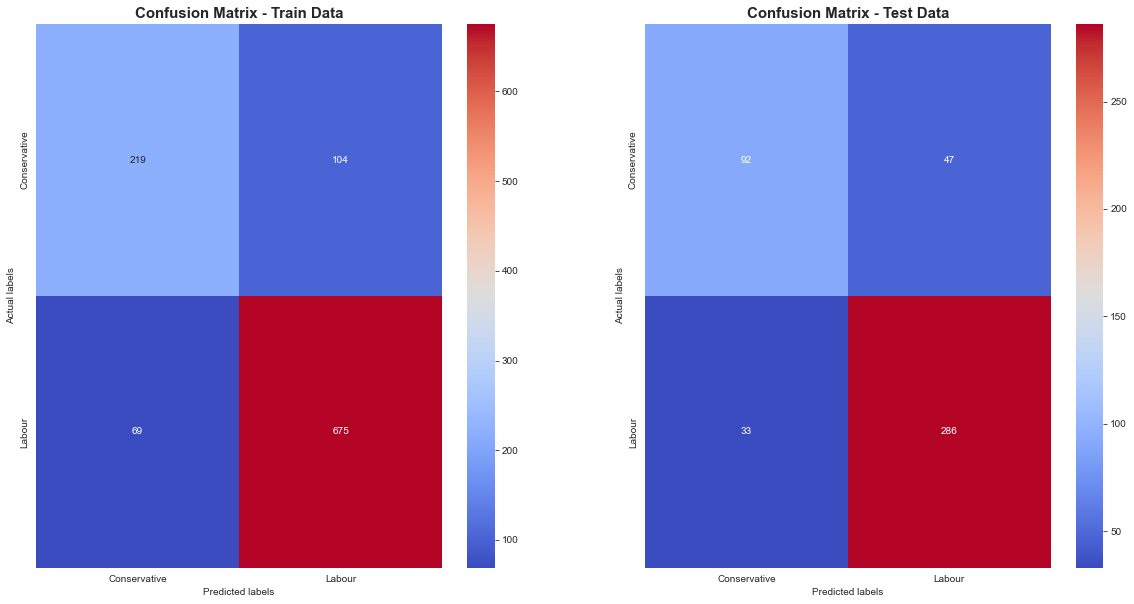

In [488]:
#Plotting confusion matrix for the different models for the Training Data
plt.figure(figsize =(20,10));
plt.subplot(1,2,1); ## Row - Column - Order
plt.title("Confusion Matrix - Train Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_lr)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')


plt.subplot(1,2,2); ## Row - Column - Order
plt.title("Confusion Matrix - Test Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_lr)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels');

### LDA

In [489]:
print('Number of rows and columns of the training set for the independent variables:',x_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',x_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1067, 10)
Number of rows and columns of the training set for the dependent variable: (1067,)
Number of rows and columns of the test set for the independent variables: (458, 10)
Number of rows and columns of the test set for the dependent variable: (458,)


In [490]:
#Build LDA Model
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(x_train,y_train)

In [491]:
# Training Data Class Prediction with a cut-off value of 0.5
ytrain_predict_lda = lda_model.predict(x_train)

# Test Data Class Prediction with a cut-off value of 0.5
ytest_predict_lda = lda_model.predict(x_test)

In [492]:
#Predict Probability
ytest_predict_prob_lda = lda_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob_lda).head()

,0,1
0,0.054892,0.945108
1,0.747070,0.252930
2,0.090739,0.909261
3,0.067145,0.932855
4,0.050229,0.949771


In [493]:
#Accuracy - Train Data
print(f"The Accuracy score (Train data) is {round(lda_model.score(x_train,y_train),4)}")

# Accuracy - Test Data
print(f"The Accuracy score (Test data) is {round(lda_model.score(x_test, y_test),4)}")

The Accuracy score (Train data) is 0.8341
The Accuracy score (Test data) is 0.8253


AUC for the Training Data: 0.896
AUC for the Test Data: 0.873


Text(0.75, 0.15, 'AUC Test Data: 0.8732')

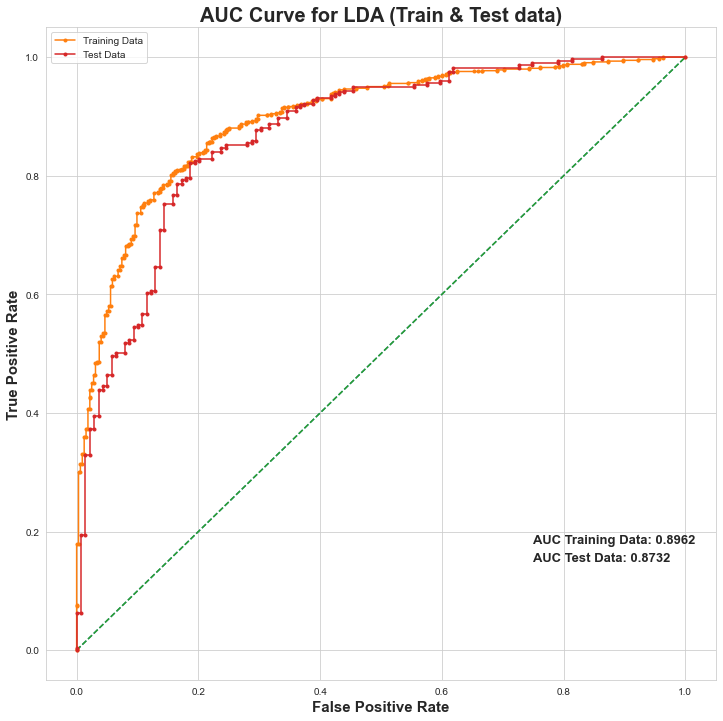

In [494]:
#Train Data Plot
# predict probabilities
probs_train = lda_model.predict_proba(x_train)

# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label = 'Training Data');



#Test Data Plot
# predict probabilities
probs_test = lda_model.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label='Test Data');


plt.title("AUC Curve for LDA (Train & Test data)",fontsize=20, weight="bold");
plt.xlabel("False Positive Rate",fontsize=15,weight="bold")
plt.ylabel("True Positive Rate",fontsize=15,weight="bold")
plt.legend(loc='best')
plt.text(0.75,0.18,f'AUC Training Data: {round(auc_train,4)}',fontsize=13, weight="bold")
plt.text(0.75,0.15,f'AUC Test Data: {round(auc_test,4)}',fontsize=13, weight="bold")

In [495]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_lda,digits=4),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_lda,digits=4),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0     0.7535    0.6718    0.7103       323
           1     0.8639    0.9046    0.8838       744

    accuracy                         0.8341      1067
   macro avg     0.8087    0.7882    0.7970      1067
weighted avg     0.8305    0.8341    0.8313      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0     0.7252    0.6835    0.7037       139
           1     0.8654    0.8871    0.8762       319

    accuracy                         0.8253       458
   macro avg     0.7953    0.7853    0.7899       458
weighted avg     0.8229    0.8253    0.8238       458
 



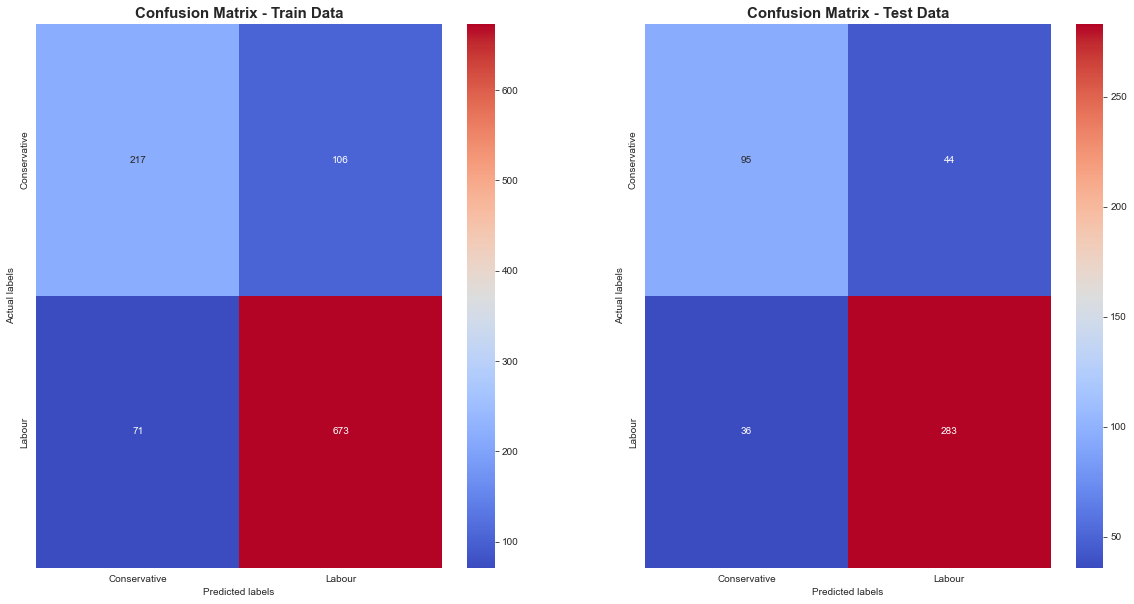

In [496]:
#Plotting confusion matrix for the different models for the Training Data
plt.figure(figsize =(20,10));
plt.subplot(1,2,1); ## Row - Column - Order
plt.title("Confusion Matrix - Train Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_lda)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')


plt.subplot(1,2,2); ## Row - Column - Order
plt.title("Confusion Matrix - Test Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_lda)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels');

### Naive Bays 

In [497]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [498]:
#Predicted Classes
ytrain_predict_nb = nb_model.predict(x_train)
ytest_predict_nb = nb_model.predict(x_test)

In [499]:
#Predict Probability
ytest_predict_prob_nb = nb_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob_nb).head()

,0,1
0,0.009988,0.990012
1,0.808260,0.191740
2,0.147829,0.852171
3,0.022197,0.977803
4,0.091739,0.908261


In [500]:
#Accuracy - Train Data
print(f"The Accuracy score (Train data) is {round(nb_model.score(x_train,y_train),4)}")

# Accuracy - Test Data
print(f"The Accuracy score (Test data) is {round(nb_model.score(x_test, y_test),4)}")

The Accuracy score (Train data) is 0.8172
The Accuracy score (Test data) is 0.7926


AUC for the Training Data: 0.875
AUC for the Test Data: 0.846


Text(0.75, 0.15, 'AUC Test Data: 0.8459')

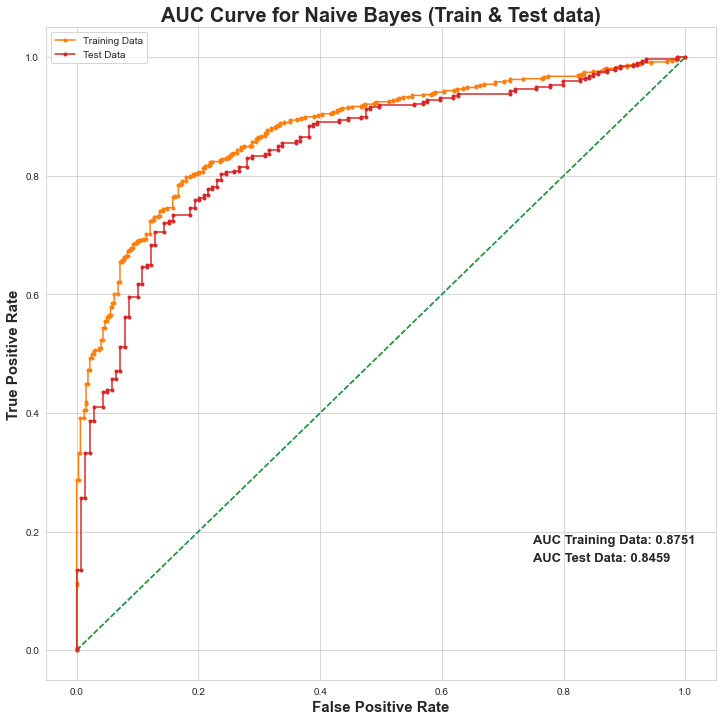

In [501]:
#Train Data Plot
# predict probabilities
probs_train = nb_model.predict_proba(x_train)

# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label = 'Training Data');



#Test Data Plot
# predict probabilities
probs_test = nb_model.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label='Test Data');


plt.title("AUC Curve for Naive Bayes (Train & Test data)",fontsize=20, weight="bold");
plt.xlabel("False Positive Rate",fontsize=15,weight="bold")
plt.ylabel("True Positive Rate",fontsize=15,weight="bold")
plt.legend(loc='best')
plt.text(0.75,0.18,f'AUC Training Data: {round(auc_train,4)}',fontsize=13, weight="bold")
plt.text(0.75,0.15,f'AUC Test Data: {round(auc_test,4)}',fontsize=13, weight="bold")

In [502]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_nb,digits=4),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_nb,digits=4),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0     0.7025    0.6873    0.6948       323
           1     0.8655    0.8737    0.8696       744

    accuracy                         0.8172      1067
   macro avg     0.7840    0.7805    0.7822      1067
weighted avg     0.8162    0.8172    0.8167      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0     0.6618    0.6475    0.6545       139
           1     0.8478    0.8558    0.8518       319

    accuracy                         0.7926       458
   macro avg     0.7548    0.7516    0.7532       458
weighted avg     0.7914    0.7926    0.7919       458
 



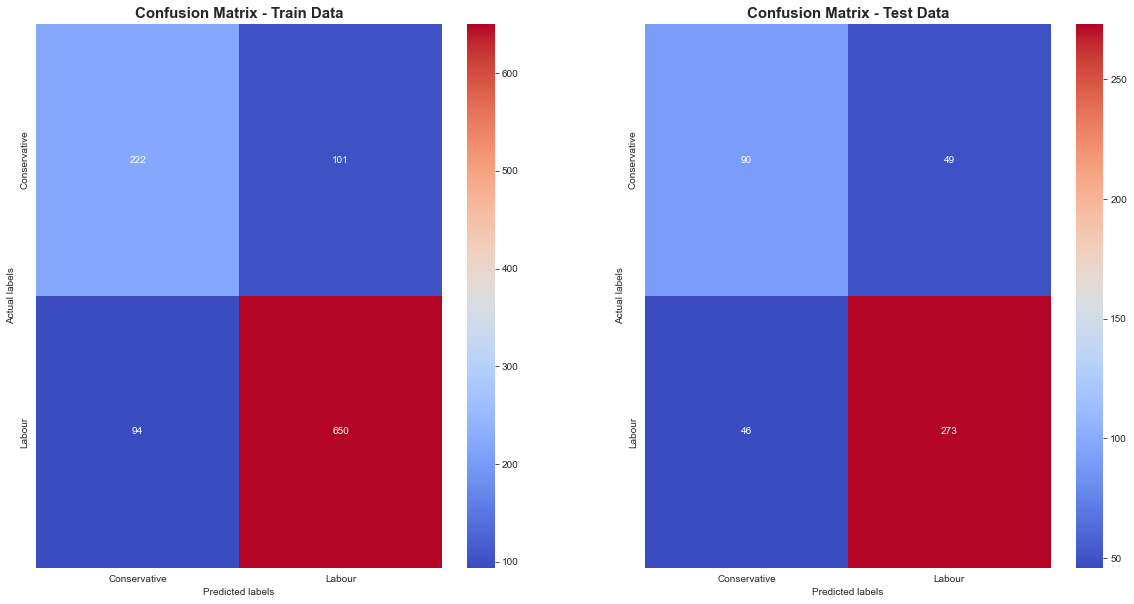

In [503]:
#Plotting confusion matrix for the different models for the Training Data
plt.figure(figsize =(20,10));
plt.subplot(1,2,1); ## Row - Column - Order
plt.title("Confusion Matrix - Train Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_nb)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')


plt.subplot(1,2,2); ## Row - Column - Order
plt.title("Confusion Matrix - Test Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_nb)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels');

### K-Nearest Neighbours (KNN)

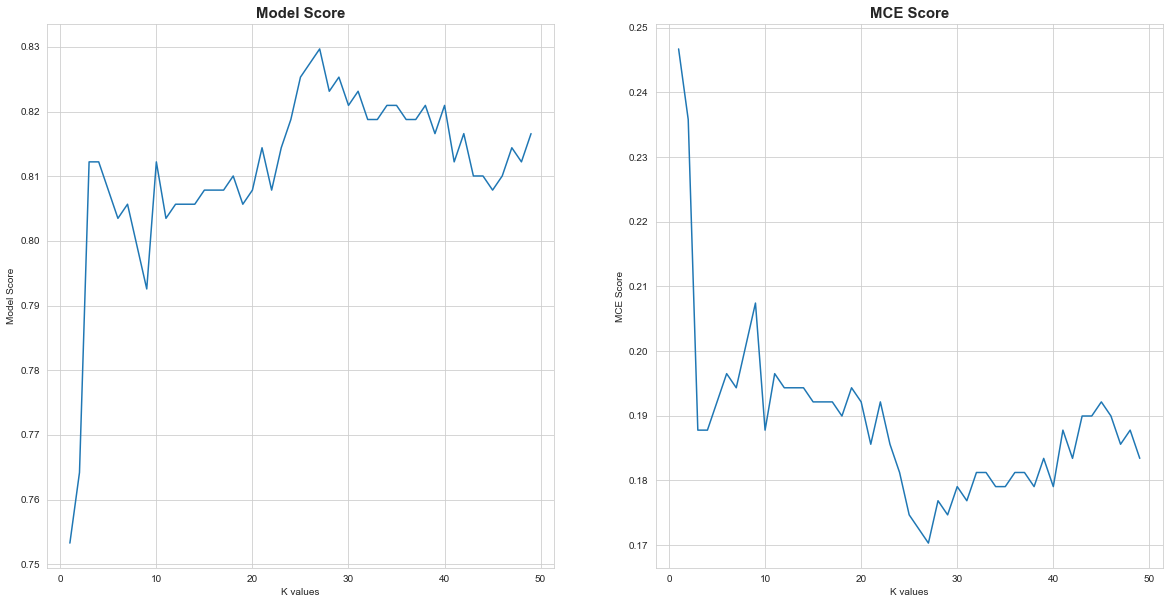

In [504]:
knn_scores = []
knn_mce_score =[]
for k in range(1,50):
    nnh = KNeighborsClassifier(n_neighbors=k)
    nnh.fit(x_train, y_train)
    knn_scores.append(nnh.score(x_test, y_test))
    knn_mce_score.append(1-nnh.score(x_test, y_test))

plt.figure(figsize =(20,10)); 
plt.subplot(1,2,1);
plt.title("Model Score",fontsize=15, weight="bold")
plt.plot(range(1,50),knn_scores)
plt.ylabel('Model Score')
plt.xlabel('K values');

plt.subplot(1,2,2);
plt.title("MCE Score",fontsize=15, weight="bold")
plt.plot(range(1,50),knn_mce_score)
plt.ylabel('MCE Score')
plt.xlabel('K values');

In [505]:
knn_model = KNeighborsClassifier(n_neighbors=27)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [506]:
#Predicted Classes
ytrain_predict_knn = knn_model.predict(x_train)
ytest_predict_knn = knn_model.predict(x_test)

In [507]:
#Predict Probability
ytest_predict_prob_knn = knn_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob_knn).head()

,0,1
0,0.037037,0.962963
1,0.740741,0.259259
2,0.111111,0.888889
3,0.037037,0.962963
4,0.000000,1.000000


In [508]:
#Accuracy - Train Data
print(f"The Accuracy score (Train data) is {round(knn_model.score(x_train,y_train),4)}")

# Accuracy - Test Data
print(f"The Accuracy score (Test data) is {round(knn_model.score(x_test, y_test),4)}")

The Accuracy score (Train data) is 0.8294
The Accuracy score (Test data) is 0.8297


AUC for the Training Data: 0.897
AUC for the Test Data: 0.868


Text(0.75, 0.15, 'AUC Test Data: 0.8678')

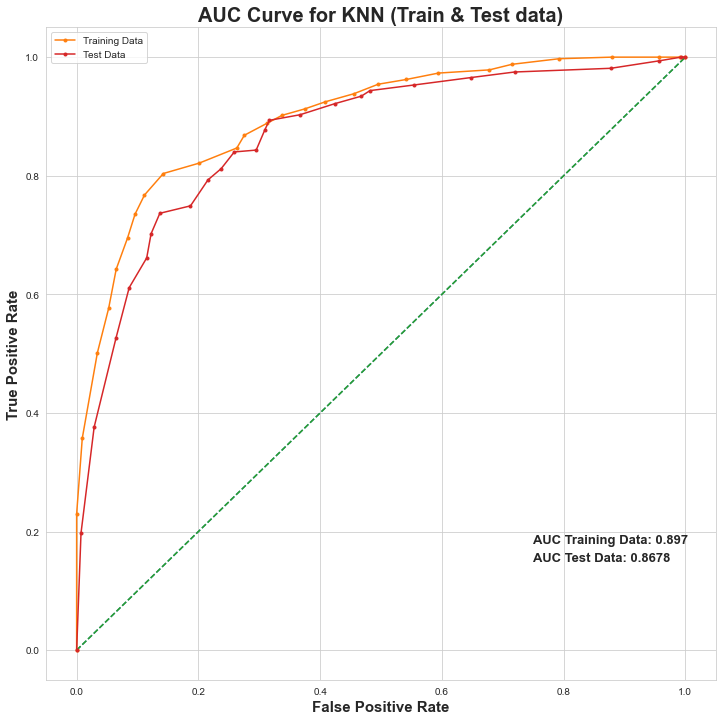

In [509]:
#Train Data Plot
# predict probabilities
probs_train = knn_model.predict_proba(x_train)

# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label = 'Training Data');



#Test Data Plot
# predict probabilities
probs_test = knn_model.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label='Test Data');


plt.title("AUC Curve for KNN (Train & Test data)",fontsize=20, weight="bold");
plt.xlabel("False Positive Rate",fontsize=15,weight="bold")
plt.ylabel("True Positive Rate",fontsize=15,weight="bold")
plt.legend(loc='best')
plt.text(0.75,0.18,f'AUC Training Data: {round(auc_train,4)}',fontsize=13, weight="bold")
plt.text(0.75,0.15,f'AUC Test Data: {round(auc_test,4)}',fontsize=13, weight="bold")

In [510]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_knn,digits=4),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_knn,digits=4),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0     0.7456    0.6625    0.7016       323
           1     0.8603    0.9019    0.8806       744

    accuracy                         0.8294      1067
   macro avg     0.8030    0.7822    0.7911      1067
weighted avg     0.8256    0.8294    0.8264      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0     0.7364    0.6835    0.7090       139
           1     0.8663    0.8934    0.8796       319

    accuracy                         0.8297       458
   macro avg     0.8013    0.7884    0.7943       458
weighted avg     0.8269    0.8297    0.8278       458
 



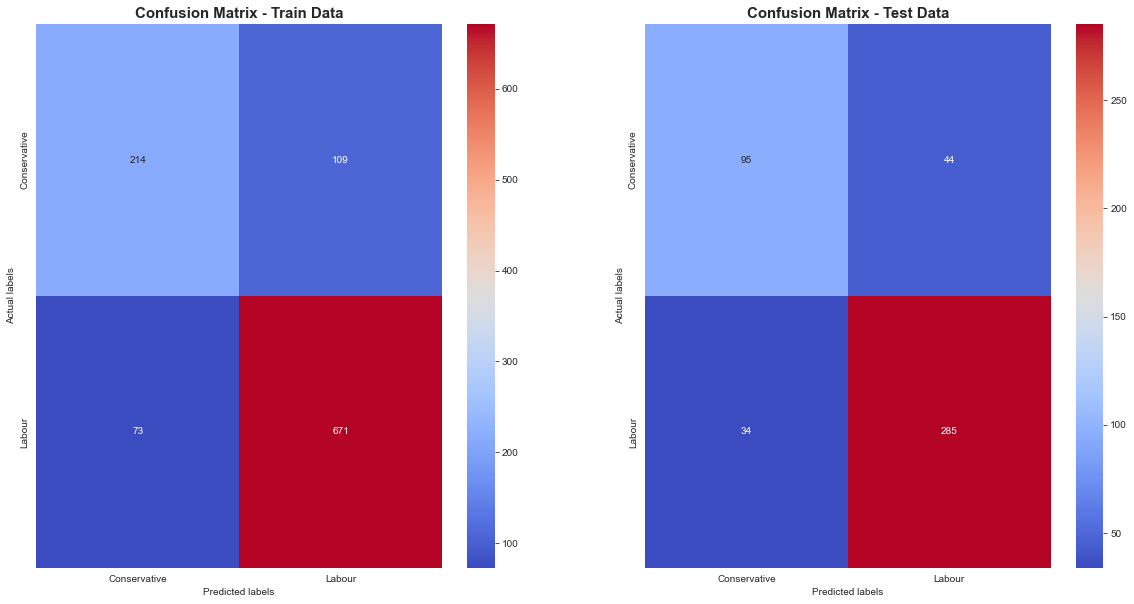

In [511]:
#Plotting confusion matrix for the different models for the Training Data
plt.figure(figsize =(20,10));
plt.subplot(1,2,1); ## Row - Column - Order
plt.title("Confusion Matrix - Train Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_knn)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')


plt.subplot(1,2,2); ## Row - Column - Order
plt.title("Confusion Matrix - Test Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_knn)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels');

### Gradient Boosting

In [512]:
gb_model = GradientBoostingClassifier()
gb_model = gb_model.fit(x_train, y_train)

In [513]:
#Predicted Classes
ytrain_predict_gb = gb_model.predict(x_train)
ytest_predict_gb = gb_model.predict(x_test)

In [514]:
#Predict Probability
ytest_predict_prob_gb = gb_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob_gb).head()

,0,1
0,0.050621,0.949379
1,0.882752,0.117248
2,0.125756,0.874244
3,0.006975,0.993025
4,0.068998,0.931002


In [515]:
#Accuracy - Train Data
print(f"The Accuracy score (Train data) is {round(gb_model.score(x_train,y_train),4)}")

# Accuracy - Test Data
print(f"The Accuracy score (Test data) is {round(gb_model.score(x_test, y_test),4)}")

The Accuracy score (Train data) is 0.8988
The Accuracy score (Test data) is 0.821


AUC for the Training Data: 0.956
AUC for the Test Data: 0.882


Text(0.75, 0.15, 'AUC Test Data: 0.8818')

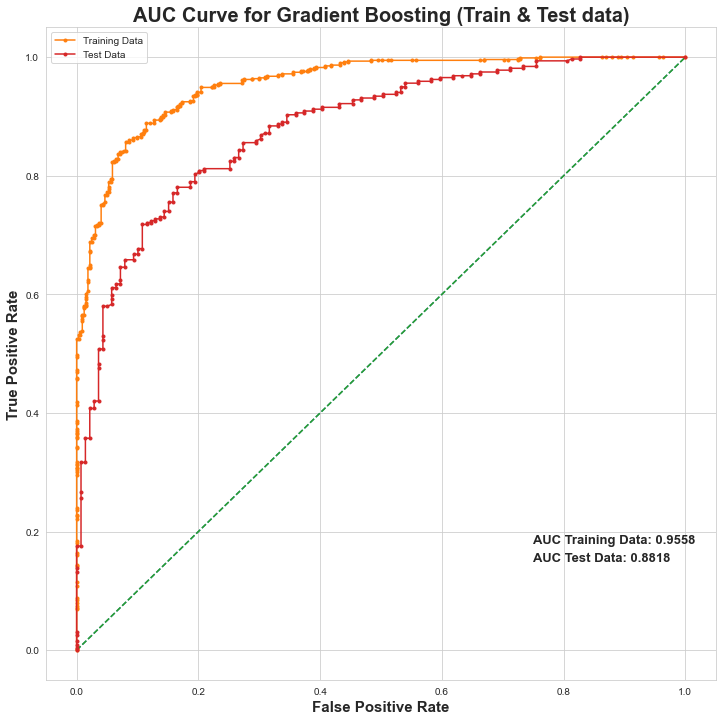

In [516]:
#Train Data Plot
# predict probabilities
probs_train = gb_model.predict_proba(x_train)

# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label = 'Training Data');



#Test Data Plot
# predict probabilities
probs_test = gb_model.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label='Test Data');


plt.title("AUC Curve for Gradient Boosting (Train & Test data)",fontsize=20, weight="bold");
plt.xlabel("False Positive Rate",fontsize=15,weight="bold")
plt.ylabel("True Positive Rate",fontsize=15,weight="bold")
plt.legend(loc='best')
plt.text(0.75,0.18,f'AUC Training Data: {round(auc_train,4)}',fontsize=13, weight="bold")
plt.text(0.75,0.15,f'AUC Test Data: {round(auc_test,4)}',fontsize=13, weight="bold")

In [517]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_gb,digits=4),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_gb,digits=4),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0     0.8595    0.7957    0.8264       323
           1     0.9141    0.9435    0.9286       744

    accuracy                         0.8988      1067
   macro avg     0.8868    0.8696    0.8775      1067
weighted avg     0.8976    0.8988    0.8976      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0     0.7244    0.6619    0.6917       139
           1     0.8580    0.8903    0.8738       319

    accuracy                         0.8210       458
   macro avg     0.7912    0.7761    0.7828       458
weighted avg     0.8175    0.8210    0.8186       458
 



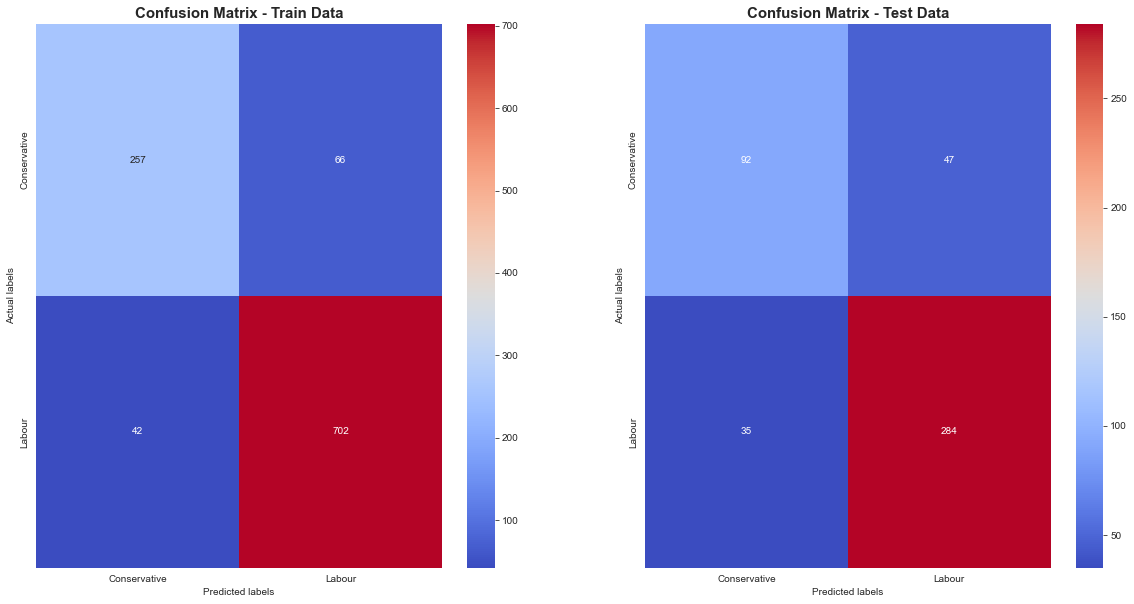

In [518]:
#Plotting confusion matrix for the different models for the Training Data
plt.figure(figsize =(20,10));
plt.subplot(1,2,1); ## Row - Column - Order
plt.title("Confusion Matrix - Train Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_gb)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')


plt.subplot(1,2,2); ## Row - Column - Order
plt.title("Confusion Matrix - Test Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_gb)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels');

### Bagging

In [519]:
cart = RandomForestClassifier(n_estimators=100)
bag_model = BaggingClassifier(base_estimator=cart,n_estimators=100)
bag_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [520]:
#Predicted Classes
ytrain_predict_bag = bag_model.predict(x_train)
ytest_predict_bag = bag_model.predict(x_test)

In [521]:
#Predict Probability
ytest_predict_prob_bag = bag_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob_bag).head()

,0,1
0,0.013400,0.986600
1,0.860800,0.139200
2,0.186900,0.813100
3,0.029900,0.970100
4,0.045693,0.954307


In [522]:
#Accuracy - Train Data
print(f"The Accuracy score (Train data) is {round(bag_model.score(x_train,y_train),4)}")

# Accuracy - Test Data
print(f"The Accuracy score (Test data) is {round(bag_model.score(x_test, y_test),4)}")

The Accuracy score (Train data) is 0.9719
The Accuracy score (Test data) is 0.821


AUC for the Training Data: 0.998
AUC for the Test Data: 0.874


Text(0.75, 0.15, 'AUC Test Data: 0.8744')

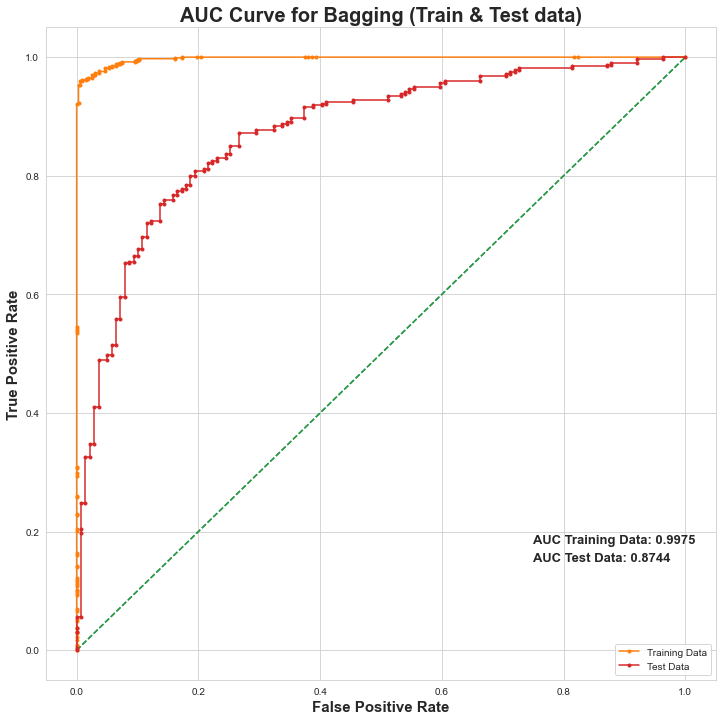

In [523]:
#Train Data Plot
# predict probabilities
probs_train = bag_model.predict_proba(x_train)

# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label = 'Training Data');



#Test Data Plot
# predict probabilities
probs_test = bag_model.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label='Test Data');


plt.title("AUC Curve for Bagging (Train & Test data)",fontsize=20, weight="bold");
plt.xlabel("False Positive Rate",fontsize=15,weight="bold")
plt.ylabel("True Positive Rate",fontsize=15,weight="bold")
plt.legend(loc='best')
plt.text(0.75,0.18,f'AUC Training Data: {round(auc_train,4)}',fontsize=13, weight="bold")
plt.text(0.75,0.15,f'AUC Test Data: {round(auc_test,4)}',fontsize=13, weight="bold")

In [524]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_bag,digits=4),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_bag,digits=4),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0     0.9741    0.9319    0.9525       323
           1     0.9710    0.9892    0.9800       744

    accuracy                         0.9719      1067
   macro avg     0.9725    0.9606    0.9663      1067
weighted avg     0.9719    0.9719    0.9717      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0     0.7317    0.6475    0.6870       139
           1     0.8537    0.8966    0.8746       319

    accuracy                         0.8210       458
   macro avg     0.7927    0.7720    0.7808       458
weighted avg     0.8167    0.8210    0.8177       458
 



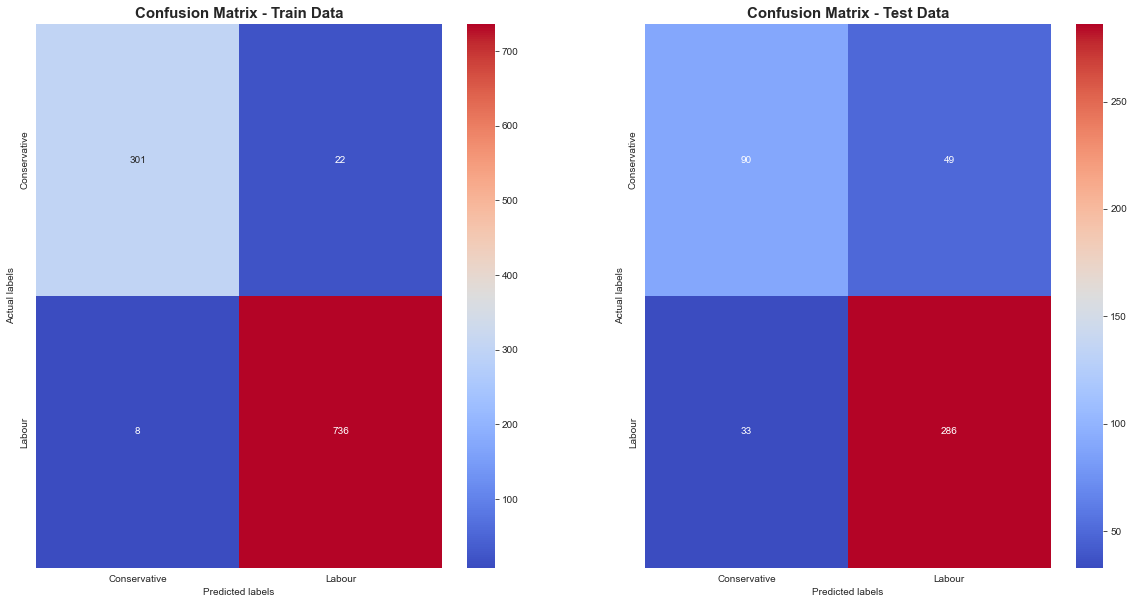

In [525]:
#Plotting confusion matrix for the different models for the Training Data
plt.figure(figsize =(20,10));
plt.subplot(1,2,1); ## Row - Column - Order
plt.title("Confusion Matrix - Train Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_bag)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')


plt.subplot(1,2,2); ## Row - Column - Order
plt.title("Confusion Matrix - Test Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_bag)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels');

### Model Tuning

In [526]:
# Initialze the estimators
clf1 = LogisticRegression()
clf2 = LinearDiscriminantAnalysis()
clf3 = GaussianNB()
clf4 = KNeighborsClassifier()
clf5 = GradientBoostingClassifier()
clf6 = BaggingClassifier()

cart1 = DecisionTreeClassifier()
cart2 = RandomForestClassifier()

In [527]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param1['classifier__penalty'] = ['l1', 'l2']
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__solver'] = ['svd', 'lsqr', 'eigen']
param2['classifier'] = [clf2]


param3 = {}
param3['classifier__var_smoothing'] = [np.logspace(0,-9, num=100)]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__n_neighbors'] = [2,5,10,25,50]
param4['classifier__p'] = [1,2],
param4['classifier__metric'] = ['minkowski','euclidean','manhattan','chebyshev', 'mahanalobis']
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_estimators'] = [10, 50, 100, 250]
param5['classifier__max_depth'] = [5, 10, 20]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__base_estimator'] = [cart1, cart2]
param6['classifier__n_estimators'] = [100, 150, 200]
param6['classifier'] = [clf6]


In [528]:
#Declare Pipeline
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6]

In [529]:
%%time
# Train the grid search model
bm_grid_search = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy')
bm_grid = bm_grid_search.fit(x_train, y_train)

CPU times: total: 234 ms
Wall time: 38.6 s


In [530]:
# Best performing model and its corresponding hyperparameters
print(bm_grid_search.best_params_,'\n')
print(bm_grid_search.best_estimator_)

{'classifier': LinearDiscriminantAnalysis(), 'classifier__solver': 'svd'} 

Pipeline(steps=[('classifier', LinearDiscriminantAnalysis())])


In [531]:
gs_df = pd.DataFrame(bm_grid_search.cv_results_)

In [532]:
gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__solver,param_classifier__var_smoothing,...,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__base_estimator,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001001,7.018853e-07,0.000000,0.000000,LogisticRegression(),0.01,None,l1,NaN,NaN,...,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",NaN,NaN,NaN,NaN,NaN,62
1,0.009212,3.986707e-03,0.002326,0.001205,LogisticRegression(),0.01,None,l2,NaN,NaN,...,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.803371,0.831461,0.788732,0.807855,0.017730,22
2,0.001356,5.024471e-04,0.000000,0.000000,LogisticRegression(),0.01,"{0: 1, 1: 5}",l1,NaN,NaN,...,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",NaN,NaN,NaN,NaN,NaN,64
3,0.007276,1.248845e-03,0.003584,0.001827,LogisticRegression(),0.01,"{0: 1, 1: 5}",l2,NaN,NaN,...,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.707865,0.710674,0.723944,0.714161,0.007012,50
4,0.001356,9.593975e-04,0.000000,0.000000,LogisticRegression(),0.01,"{0: 1, 1: 10}",l1,NaN,NaN,...,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",NaN,NaN,NaN,NaN,NaN,65


In [533]:
gs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mean_fit_time                     87 non-null     float64
 1   std_fit_time                      87 non-null     float64
 2   mean_score_time                   87 non-null     float64
 3   std_score_time                    87 non-null     float64
 4   param_classifier                  87 non-null     object 
 5   param_classifier__C               40 non-null     object 
 6   param_classifier__class_weight    30 non-null     object 
 7   param_classifier__penalty         40 non-null     object 
 8   param_classifier__solver          3 non-null      object 
 9   param_classifier__var_smoothing   1 non-null      object 
 10  param_classifier__metric          25 non-null     object 
 11  param_classifier__n_neighbors     25 non-null     object 
 12  param_clas

In [534]:
gs_df["param_classifier"] = gs_df["param_classifier"].astype(str)

Text(0, 0.5, 'Average Score (Accuracy)')

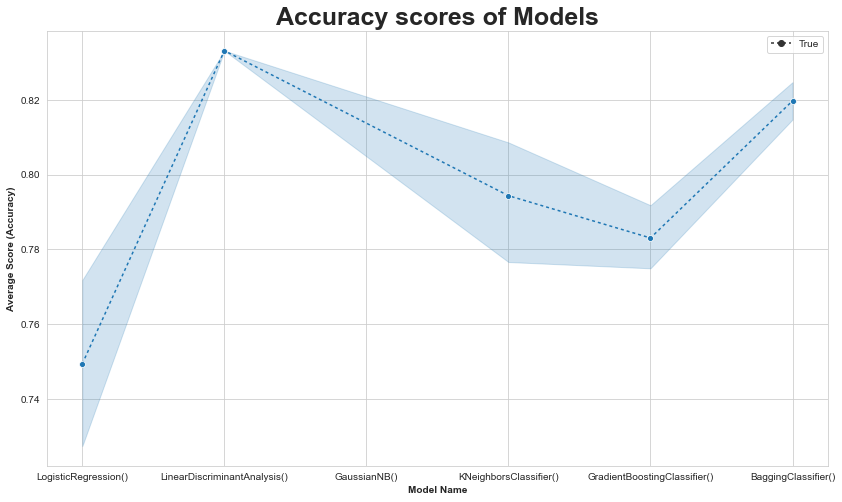

In [535]:
plt.figure(figsize=(14,8))
plt.title("Accuracy scores of Models",fontsize=25, weight="bold")
sns.set_style("whitegrid")

sns.lineplot(data=gs_df, x="param_classifier", y="mean_test_score",markers='o',style=True,dashes=[(2,2)]);
plt.xlabel('Model Name',fontsize=10, weight="bold")
plt.ylabel('Average Score (Accuracy)',fontsize=10, weight="bold")

In [536]:
best_model = bm_grid_search.best_estimator_

In [537]:
bm_clf = best_model.fit(x_train, y_train)

In [538]:
#Predicted Classes
ytrain_predict_bm = best_model.predict(x_train)
ytest_predict_bm = best_model.predict(x_test)

In [539]:
#Predict Probability
ytest_predict_prob_bm = best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob_bm).head()

,0,1
0,0.054892,0.945108
1,0.747070,0.252930
2,0.090739,0.909261
3,0.067145,0.932855
4,0.050229,0.949771


In [540]:
#Accuracy - Train Data
print(f"The Accuracy score (Train data) is {round(best_model.score(x_train,y_train),4)}")

# Accuracy - Test Data
print(f"The Accuracy score (Test data) is {round(best_model.score(x_test, y_test),4)}")

The Accuracy score (Train data) is 0.8341
The Accuracy score (Test data) is 0.8253


AUC for the Training Data: 0.896
AUC for the Test Data: 0.873


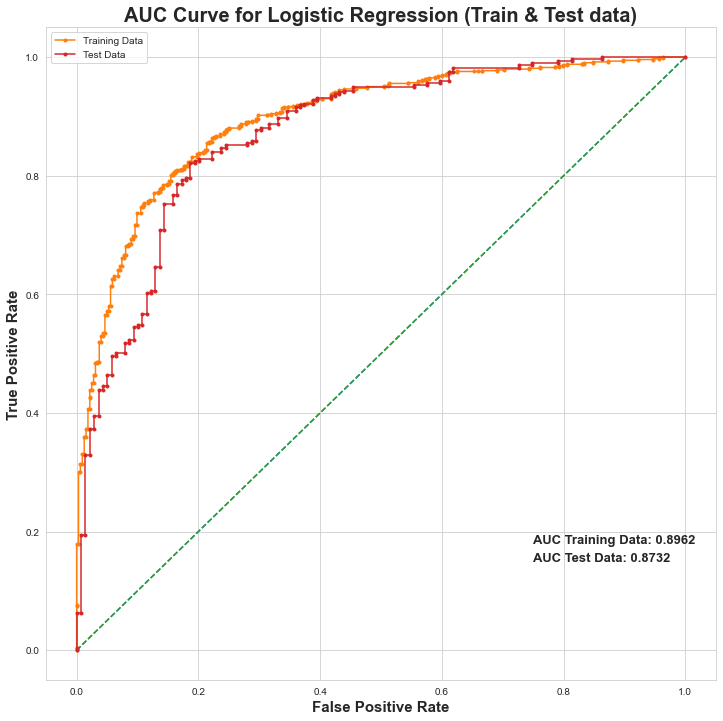

In [541]:
#Train Data Plot
# predict probabilities
probs_train = best_model.predict_proba(x_train)

# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]

# calculate AUC
auc_train = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,marker='.',label = 'Training Data');



#Test Data Plot
# predict probabilities
probs_test = best_model.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]

# calculate AUC
auc_test = roc_auc_score(y_test, probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(test_fpr, test_tpr, marker='.',label='Test Data');


plt.title("AUC Curve for Logistic Regression (Train & Test data)",fontsize=20, weight="bold");
plt.xlabel("False Positive Rate",fontsize=15,weight="bold")
plt.ylabel("True Positive Rate",fontsize=15,weight="bold")
plt.legend(loc='best')
plt.text(0.75,0.18,f'AUC Training Data: {round(auc_train,4)}',fontsize=13, weight="bold")
plt.text(0.75,0.15,f'AUC Test Data: {round(auc_test,4)}',fontsize=13, weight="bold")
plt.show()


In [542]:
# Performance measures using Classification report on training set
print('Classification Report of the training data:\n\n',classification_report(y_train, ytrain_predict_bm,digits=4))

# Performance measures using Classification report on Test set
print('Classification Report of the test data:\n\n',classification_report(y_test, ytest_predict_bm,digits=4))

Classification Report of the training data:

               precision    recall  f1-score   support

           0     0.7535    0.6718    0.7103       323
           1     0.8639    0.9046    0.8838       744

    accuracy                         0.8341      1067
   macro avg     0.8087    0.7882    0.7970      1067
weighted avg     0.8305    0.8341    0.8313      1067

Classification Report of the test data:

               precision    recall  f1-score   support

           0     0.7252    0.6835    0.7037       139
           1     0.8654    0.8871    0.8762       319

    accuracy                         0.8253       458
   macro avg     0.7953    0.7853    0.7899       458
weighted avg     0.8229    0.8253    0.8238       458



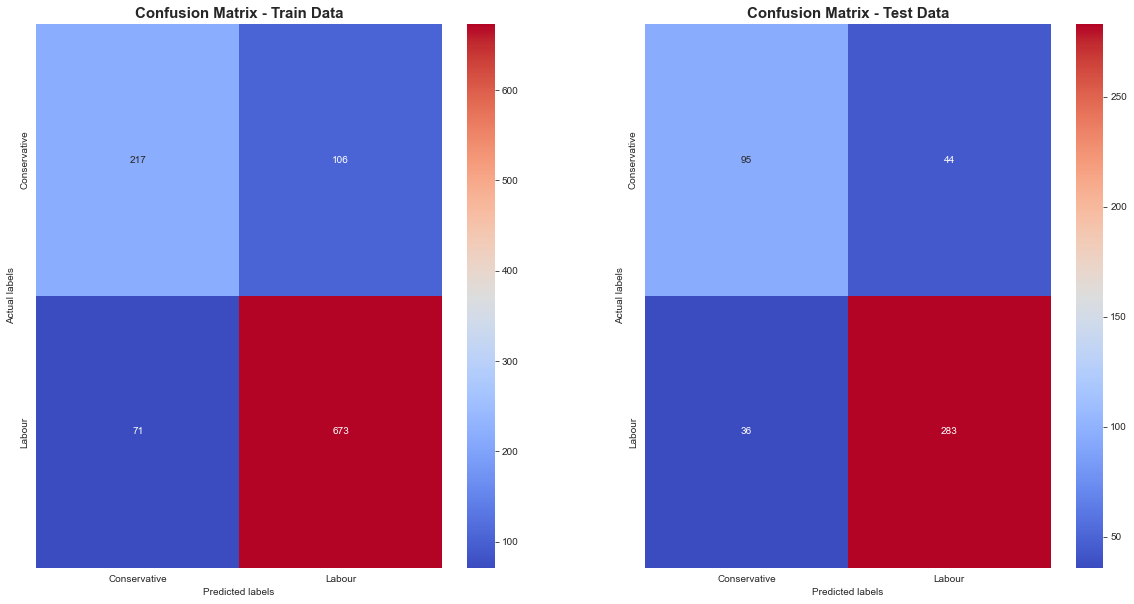

In [543]:
#Plotting confusion matrix for the different models for the Training Data
plt.figure(figsize =(20,10));
plt.subplot(1,2,1); ## Row - Column - Order
plt.title("Confusion Matrix - Train Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_bm)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')


plt.subplot(1,2,2); ## Row - Column - Order
plt.title("Confusion Matrix - Test Data",fontsize=15, weight="bold")
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_bm)),annot=True,xticklabels = ["Conservative", "Labour"] , yticklabels = ["Conservative", "Labour"],fmt='.5g',cmap='coolwarm');
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels');

In [544]:
prediction_df_train = pd.DataFrame(ytrain_predict_bm,columns=["Train Data Prediction"])
a_val = prediction_df_train["Train Data Prediction"].value_counts(normalize=True)*100
a_val

1    73.008435
0    26.991565
Name: Train Data Prediction, dtype: float64

In [545]:
prediction_df_test = pd.DataFrame(ytest_predict_bm,columns=["Test Data Prediction"])
b_val = prediction_df_test["Test Data Prediction"].value_counts(normalize=True)*100
b_val

1    71.39738
0    28.60262
Name: Test Data Prediction, dtype: float64

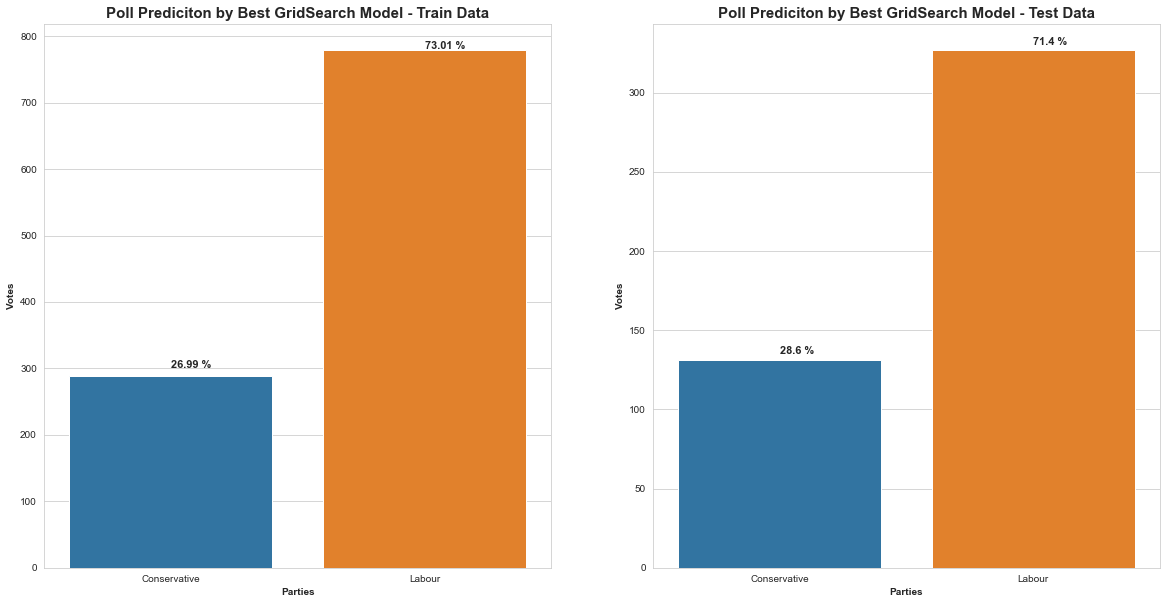

In [546]:
#Plotting POll Prediciton by Best GridSearch Model for the different models for the Training Data
plt.figure(figsize =(20,10));
sns.set_style("whitegrid")
plt.subplot(1,2,1); ## Row - Column - Order
plt.title("Poll Prediciton by Best GridSearch Model - Train Data",fontsize=15, weight="bold")
ax = sns.countplot(data=prediction_df_train,x="Train Data Prediction")
plt.ylabel('Votes',fontsize=10, weight="bold")
plt.xlabel('Parties',fontsize=10, weight="bold")
plt.text(0,300,f'{round(a_val[0],2)} %',fontsize=11, weight="bold")
plt.text(1,780,f'{round(a_val[1],2)} %',fontsize=11, weight="bold")
ax.set(xticklabels = ("Conservative","Labour"))

plt.subplot(1,2,2); ## Row - Column - Order
plt.title("Poll Prediciton by Best GridSearch Model - Test Data",fontsize=15, weight="bold")
ax = sns.countplot(data=prediction_df_test,x="Test Data Prediction")
plt.ylabel('Votes',fontsize=10, weight="bold")
plt.xlabel('Parties',fontsize=10, weight="bold");
plt.text(0,135,f'{round(b_val[0],2)} %',fontsize=11, weight="bold")
plt.text(1,330,f'{round(b_val[1],2)} %',fontsize=11, weight="bold");
ax.set(xticklabels = ("Conservative","Labour"));

In [547]:
data_anly_df = pd.DataFrame()
indicies_tst = x_test.index.tolist()
for i in range(0 , len(indicies_tst)):
    data_anly_df = data_anly_df.append(ml_df_tmp.loc[indicies_tst[i]])

In [610]:
data_anly_df.drop(["vote"],axis=1,inplace=True)
data_anly_df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1396,77,4,3,4,2,3,2,male
290,75,2,3,4,4,8,2,female
842,24,3,2,4,2,10,2,female
1522,37,3,3,5,4,2,2,male
835,44,3,3,4,2,11,0,female


In [617]:
data_anly_df["Predicted Vote"] = y_test
data_anly_df["Predicted Vote"] = np.where(data_anly_df["Predicted Vote"] == 1, "Labour", data_anly_df["Predicted Vote"])
data_anly_df["Predicted Vote"] = np.where(data_anly_df["Predicted Vote"] == '0', "Conservative", data_anly_df["Predicted Vote"])
data_anly_df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,Predicted Vote
1396,77,4,3,4,2,3,2,male,Labour
290,75,2,3,4,4,8,2,female,Conservative
842,24,3,2,4,2,10,2,female,Conservative
1522,37,3,3,5,4,2,2,male,Labour
835,44,3,3,4,2,11,0,female,Labour


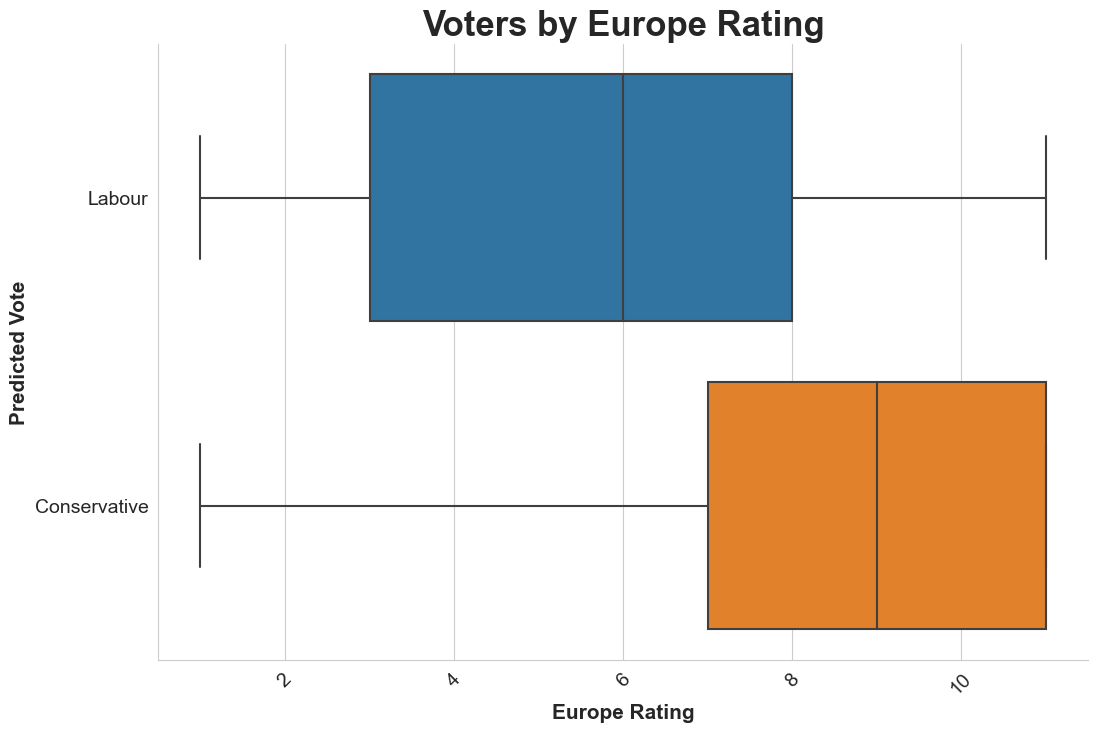

In [626]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(12,8))
plt.title("Voters by Europe Rating",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= data_anly_df, x= "Europe", y="Predicted Vote");


#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 45)
plt.xlabel("Europe Rating",fontsize=15, weight="bold");
plt.ylabel("Predicted Vote",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

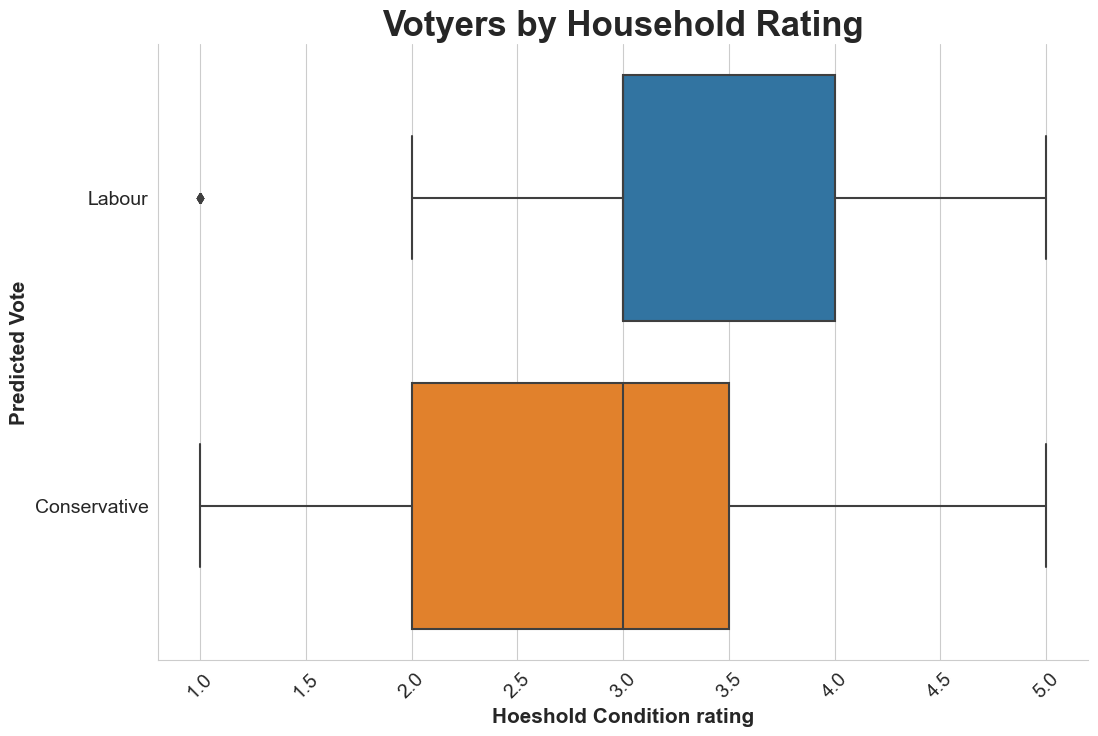

In [627]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(12,8))
plt.title("Votyers by Household Rating",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= data_anly_df, x= "economic.cond.household", y="Predicted Vote");


#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 45)
plt.xlabel("Hoeshold Condition rating",fontsize=15, weight="bold");
plt.ylabel("Predicted Vote",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

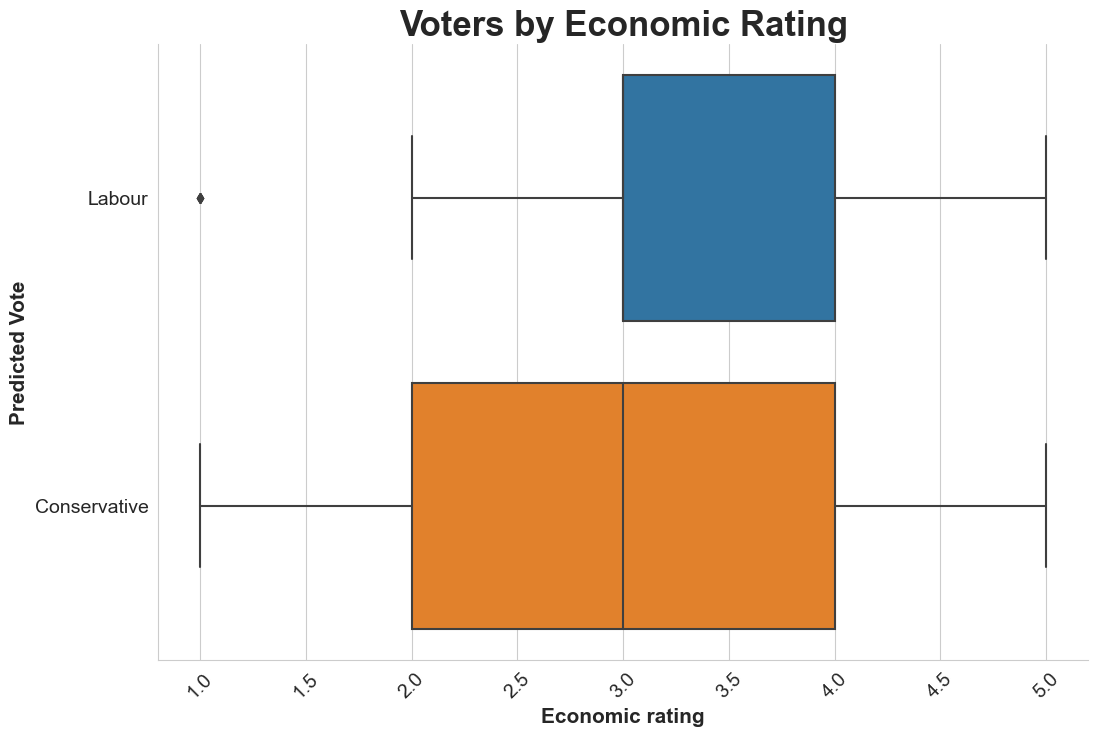

In [628]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(12,8))
plt.title("Voters by Economic Rating",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= data_anly_df, x= "economic.cond.national", y="Predicted Vote");


#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 45)
plt.xlabel("Economic rating",fontsize=15, weight="bold");
plt.ylabel("Predicted Vote",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

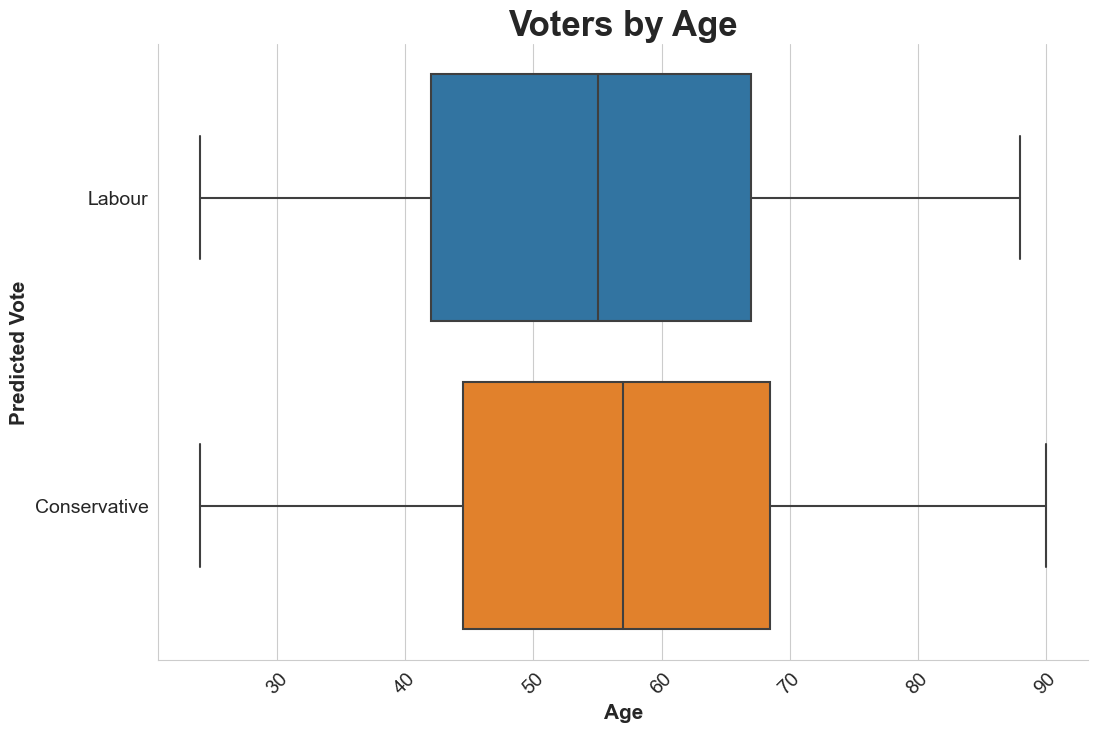

In [629]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(12,8))
plt.title("Voters by Age",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= data_anly_df, x= "age", y="Predicted Vote");


#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 45)
plt.xlabel("Age",fontsize=15, weight="bold");
plt.ylabel("Predicted Vote",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

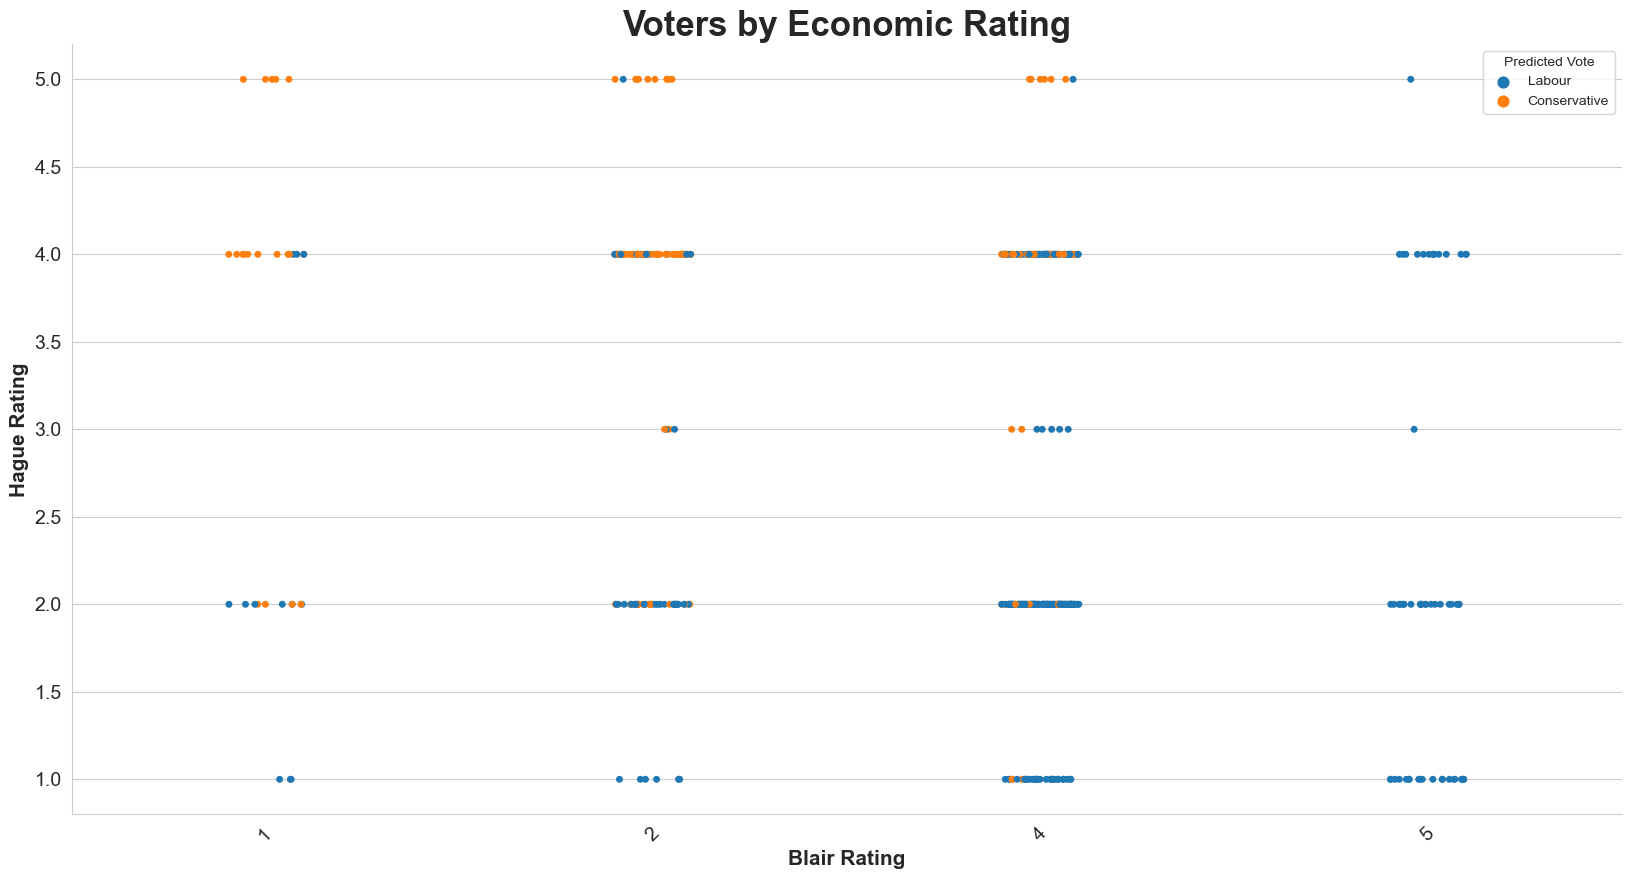

In [635]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("Voters by Economic Rating",fontsize=25, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.stripplot(data= data_anly_df, x= "Blair", y="Hague",hue="Predicted Vote",jitter=True);


#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 45)
plt.xlabel("Blair Rating",fontsize=15, weight="bold");
plt.ylabel("Hague Rating",fontsize=15, weight="bold");
ax.tick_params(labelsize = 14)

## Text Mining

In [549]:
## Importing the inaugural speeches
nltk.download('inaugural')
inaugural.fileids()

[nltk_data] Downloading package inaugural to C:\Users\Ant
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

### Franklin D Roosevelt - 1941

In [550]:
# Reading the Text of Franklin D Roosavelt - 1941 speech
FDR_1941 = "1941-Roosevelt.txt"
print(inaugural.raw(FDR_1941))

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [551]:
## Reading the first 20 words in speech
print(inaugural.words(FDR_1941)[:20])

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United']


In [552]:
no_of_chars_FDR = len(inaugural.raw(FDR_1941))
no_of_words_FDR  = len(inaugural.words(FDR_1941))
no_of_sents_FDR  = len(inaugural.sents(FDR_1941))

In [553]:
#Charecters, Word and Sentences Count
print(f" The number of characters in Franklin D Roosevelt speech of 1941 is: {no_of_chars_FDR }")
print(f" The number of words in Franklin D Roosevelt speech of 1941 is: {no_of_words_FDR }")
print(f" The number of sentences in Franklin D Roosevelt speech of 1941 is: {no_of_sents_FDR }")

speech = pd.DataFrame({"FDR_speech" :[no_of_chars_FDR ,no_of_words_FDR ,no_of_sents_FDR ]}, index = ['characters','words','sentences'])

 The number of characters in Franklin D Roosevelt speech of 1941 is: 7571
 The number of words in Franklin D Roosevelt speech of 1941 is: 1536
 The number of sentences in Franklin D Roosevelt speech of 1941 is: 68


In [554]:
speech

,FDR_speech
characters,7571
words,1536
sentences,68


[Text(0, 5, '7571'), Text(0, 5, '1536'), Text(0, 5, '68')]

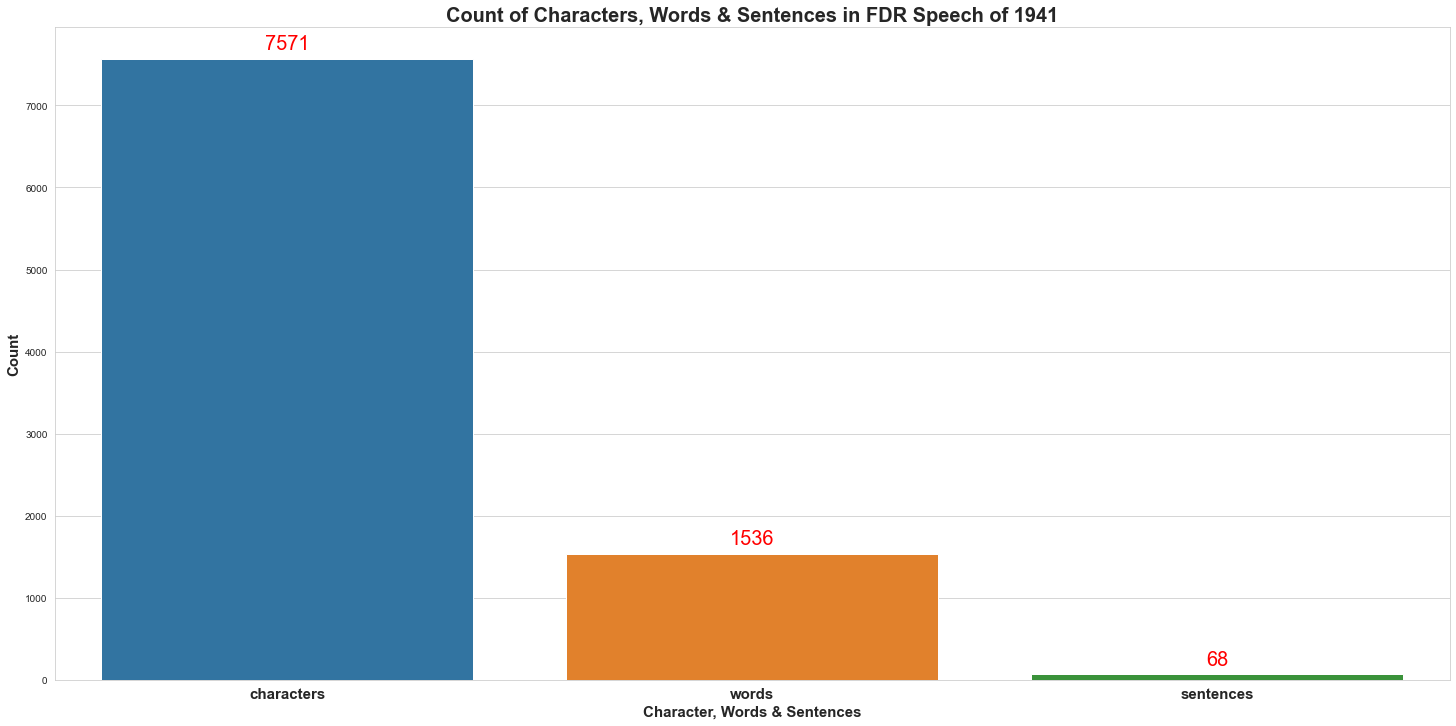

In [555]:
# Visualizing the counts
plt.figure(figsize =(25, 12))
plt.title("Count of Characters, Words & Sentences in FDR Speech of 1941",fontsize=20, weight="bold")
ax=sns.barplot(x =speech.index, y = 'FDR_speech', data = speech)

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0,fontsize=15, weight="bold")
plt.xlabel("Character, Words & Sentences",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 20,padding =5)

In [556]:
## Converting to Lower Case
raw = inaugural.raw(FDR_1941).lower()
raw

'on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states.\n\nin washington\'s day the task of the people was to create and weld together a nation.\n\nin lincoln\'s day the task of the people was to preserve that nation from disruption from within.\n\nin this day the task of the people is to save that nation and its institutions from disruption from without.\n\nto us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction.\n\nlives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live.\n\nthere are men who doubt this. there are men who believe that democr

In [557]:
## Cleaning the special characters (/@$: etc)
raw = re.sub("[^a-zA-Z]"," ",str(raw))
raw

'on each national day of inauguration since       the people have renewed their sense of dedication to the united states   in washington s day the task of the people was to create and weld together a nation   in lincoln s day the task of the people was to preserve that nation from disruption from within   in this day the task of the people is to save that nation and its institutions from disruption from without   to us there has come a time  in the midst of swift happenings  to pause for a moment and take stock    to recall what our place in history has been  and to rediscover what we are and what we may be  if we do not  we risk the real peril of inaction   lives of nations are determined not by the count of years  but by the lifetime of the human spirit  the life of a man is three score years and ten  a little more  a little less  the life of a nation is the fullness of the measure of its will to live   there are men who doubt this  there are men who believe that democracy  as a form

In [558]:
## Tokenization -  Splitting the text files into words
tokens = nltk.word_tokenize(raw)
print(tokens)

['on', 'each', 'national', 'day', 'of', 'inauguration', 'since', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'united', 'states', 'in', 'washington', 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', 'in', 'lincoln', 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'nation', 'from', 'disruption', 'from', 'within', 'in', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', 'to', 'us', 'there', 'has', 'come', 'a', 'time', 'in', 'the', 'midst', 'of', 'swift', 'happenings', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', 'if', 'we', 'do', 'not', 'we', 'risk', 'the', 'real', 'peril

In [559]:
# Stop words -  Removing words that are not useful or Removing meaningless words 
en_stop = stopwords.words('english')
stopped_tokens = [i for i in tokens if not i in en_stop]

In [560]:
print(f"Total number of token words are: {len(stopped_tokens)}")

Total number of token words are: 625


In [561]:
## Stemming Using Lemmatizer -  Stem the words to its root word
lt = nltk.WordNetLemmatizer()
texts = [lt.lemmatize(i) for i in stopped_tokens]

In [562]:
#Charecters, Word and Sentences Count
print(f" The number of words in Franklin D Roosevelt speech of 1941 (Before Tokenisation) is: {no_of_words_FDR }")
print(f" The number of words in Franklin D Roosevelt speech of 1941 (After tokenisation) is: {len(texts)}")


 The number of words in Franklin D Roosevelt speech of 1941 (Before Tokenisation) is: 1536
 The number of words in Franklin D Roosevelt speech of 1941 (After tokenisation) is: 625


In [563]:
## Reading the first 10 tokenized words in speech
print(texts[:20])

['national', 'day', 'inauguration', 'since', 'people', 'renewed', 'sense', 'dedication', 'united', 'state', 'washington', 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', 'day']


In [564]:
# Top 10 frequency occuring words
FDR_10 = nltk.FreqDist(texts).most_common(10)
FDR_10

[('nation', 15),
 ('life', 11),
 ('know', 10),
 ('people', 9),
 ('spirit', 9),
 ('democracy', 9),
 ('u', 8),
 ('america', 8),
 ('year', 7),
 ('freedom', 6)]

In [565]:
nltk.FreqDist(texts).most_common(30)

[('nation', 15),
 ('life', 11),
 ('know', 10),
 ('people', 9),
 ('spirit', 9),
 ('democracy', 9),
 ('u', 8),
 ('america', 8),
 ('year', 7),
 ('freedom', 6),
 ('human', 5),
 ('men', 5),
 ('new', 5),
 ('body', 5),
 ('mind', 5),
 ('speaks', 5),
 ('day', 4),
 ('state', 4),
 ('government', 4),
 ('american', 4),
 ('must', 4),
 ('something', 4),
 ('faith', 4),
 ('united', 3),
 ('task', 3),
 ('within', 3),
 ('history', 3),
 ('three', 3),
 ('measure', 3),
 ('live', 3)]

In [566]:
FDR_30_df = pd.DataFrame.from_records(nltk.FreqDist(texts).most_common(30),columns=["Words", "Count"])
FDR_30_df

,Words,Count
0,nation,15
1,life,11
2,know,10
3,people,9
4,spirit,9
5,democracy,9
6,u,8
7,america,8
8,year,7
9,freedom,6


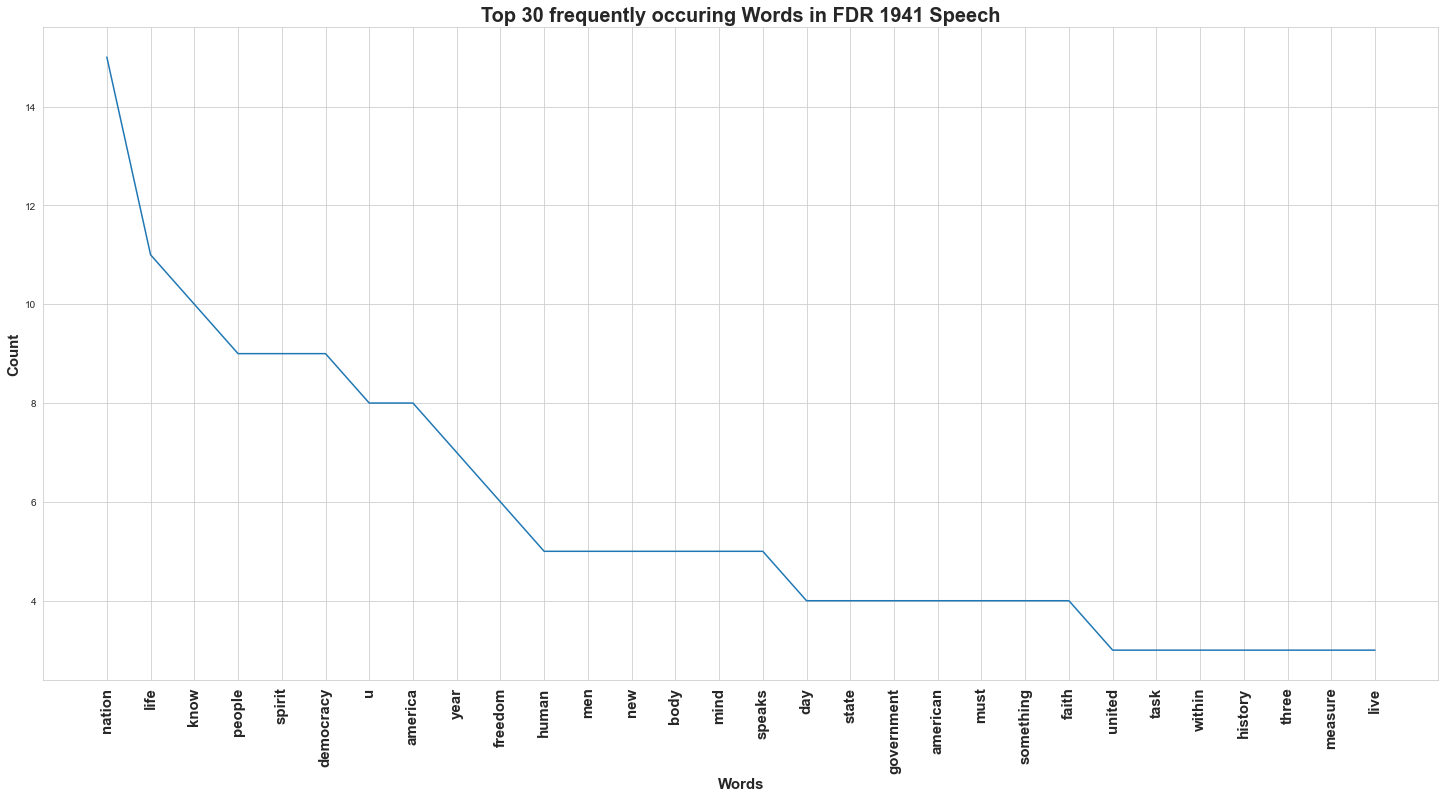

In [567]:
## Plotting the top 30 words occuring frequently
plt.figure(figsize =(25, 12))
plt.title("Top 30 frequently occuring Words in FDR 1941 Speech",fontsize=20, weight="bold")
sns.set_style('whitegrid')
sns.lineplot(data=FDR_30_df,x="Words",y="Count")

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 90,fontsize=15, weight="bold")
plt.xlabel("Words",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");

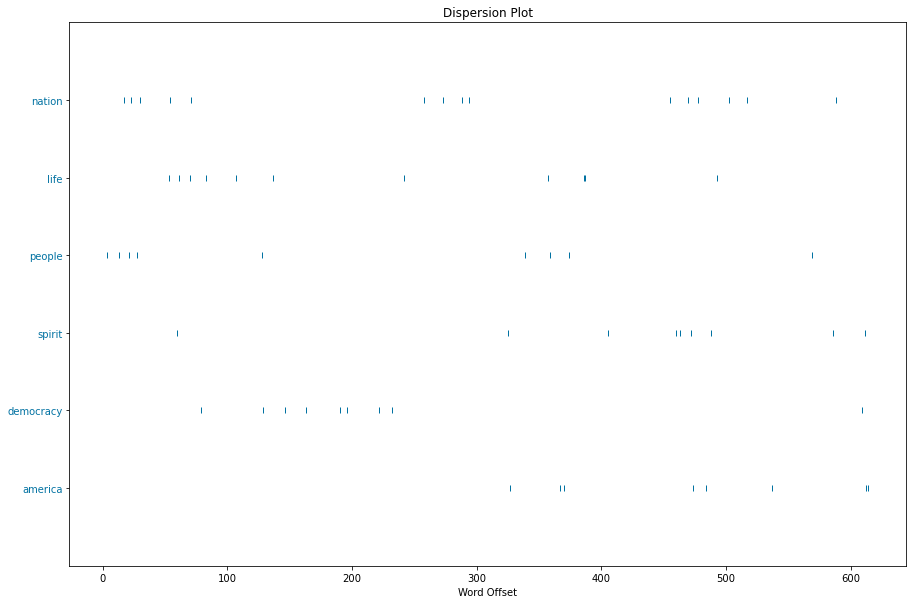

In [568]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
words_used = ["nation","life","people", "spirit","democracy", "america"]
dispersion_plot(texts, words_used, ignore_case=True, title='Dispersion Plot')

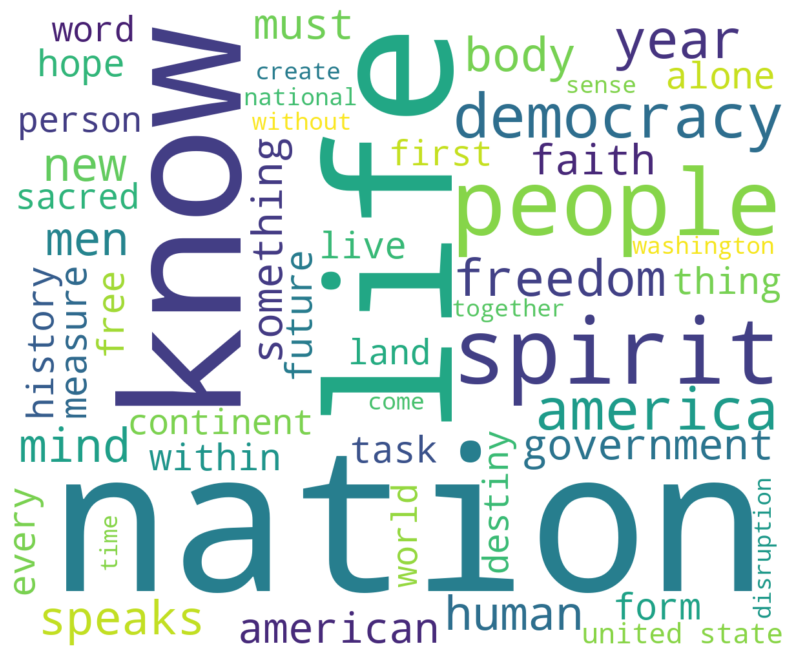

In [569]:
new_words = set(STOPWORDS)
new_words.update(['u','still','came', 'three', 'day'])

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',max_words=50,
                            width=1200,stopwords=new_words ,
                            height=1000).generate(" ".join(texts))

# plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### John F Kennedy - 1961

In [570]:
# Reading the Text of John F Kennedy - 1961 speech
JFK_1961 = "1961-Kennedy.txt"
print(inaugural.raw(JFK_1961))

Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.

We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [571]:
## Reading the first 20 words in speech
print(inaugural.words(JFK_1961)[:20])

['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',']


In [572]:
no_of_chars_JFK = len(inaugural.raw(JFK_1961))
no_of_words_JFK  = len(inaugural.words(JFK_1961))
no_of_sents_JFK  = len(inaugural.sents(JFK_1961))

In [573]:
#Charecters, Word and Sentences Count
print(f" The number of characters in John F kennedy speech of 1961 is: {no_of_chars_JFK }")
print(f" The number of words in John F kennedy speech of 1961 is: {no_of_words_JFK }")
print(f" The number of sentences in John F kennedy speech of 1961 is: {no_of_sents_JFK }")

speech2 = pd.DataFrame({"JFK_speech" :[no_of_chars_JFK ,no_of_words_JFK ,no_of_sents_JFK ]}, index = ['characters','words','sentences'])

 The number of characters in John F kennedy speech of 1961 is: 7618
 The number of words in John F kennedy speech of 1961 is: 1546
 The number of sentences in John F kennedy speech of 1961 is: 52


In [574]:
speech2

,JFK_speech
characters,7618
words,1546
sentences,52


[Text(0, 5, '7618'), Text(0, 5, '1546'), Text(0, 5, '52')]

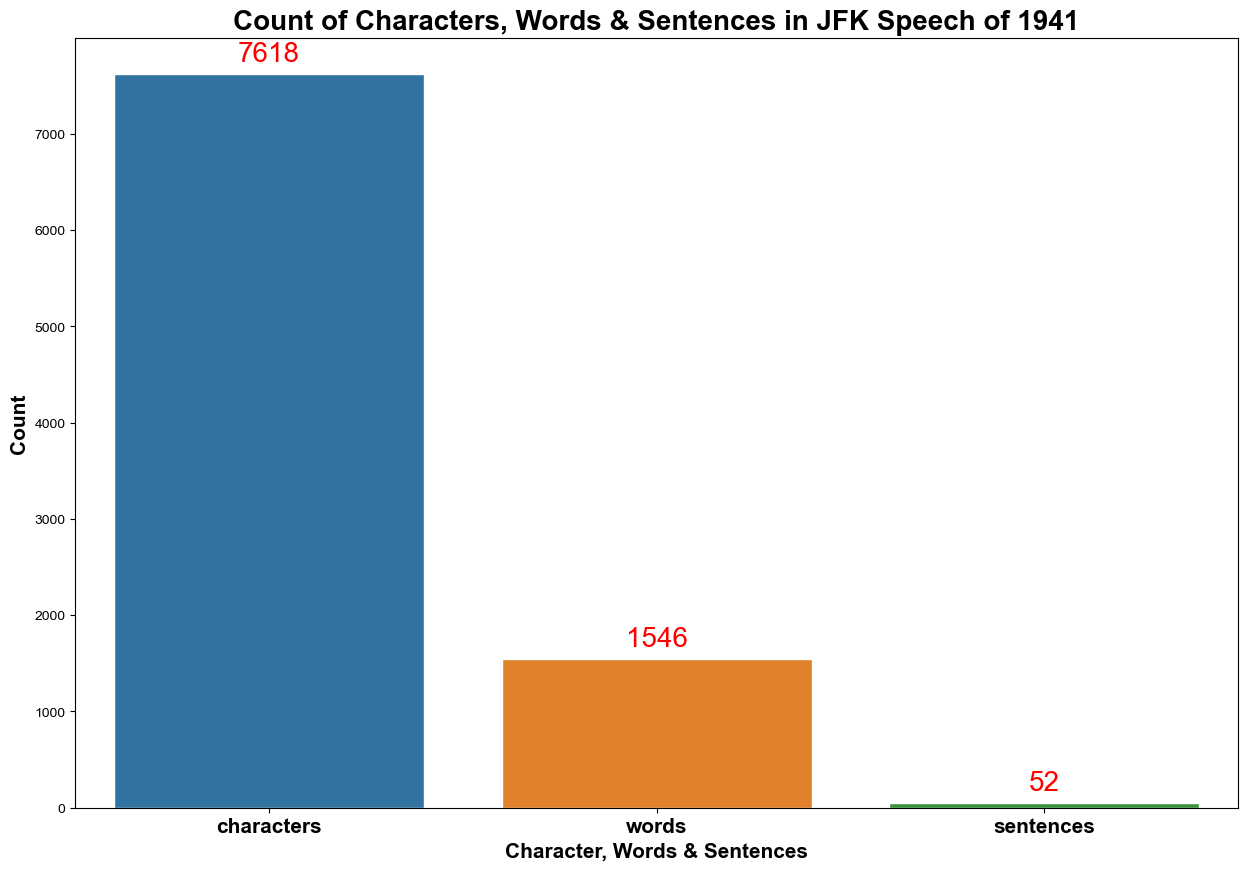

In [575]:
# Visualizing the counts
plt.figure(figsize =(15, 10))
plt.title("Count of Characters, Words & Sentences in JFK Speech of 1941",fontsize=20, weight="bold")
sns.set_style("whitegrid")
ax=sns.barplot(x =speech2.index, y = 'JFK_speech', data = speech2)

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0,fontsize=15, weight="bold")
plt.xlabel("Character, Words & Sentences",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 20,padding =5)

In [576]:
## Converting to Lower Case
raw2 = inaugural.raw(JFK_1961).lower()
raw2

'vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nthe world is very different now. for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of god.\n\nwe dare not forget today that we are the heirs of that first revolution. let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [577]:
## Cleaning the special characters (/@$: etc)
raw2 = re.sub("[^a-zA-Z]"," ",str(raw2))
raw2

'vice president johnson  mr  speaker  mr  chief justice  president eisenhower  vice president nixon  president truman  reverend clergy  fellow citizens  we observe today not a victory of party  but a celebration of freedom    symbolizing an end  as well as a beginning    signifying renewal  as well as change  for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago   the world is very different now  for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life  and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe    the belief that the rights of man come not from the generosity of the state  but from the hand of god   we dare not forget today that we are the heirs of that first revolution  let the word go forth from this time and place  to friend and foe alike  that the torch has been passed to a new generatio

In [578]:
## Tokenization -  Splitting the text files into words
tokens2 = nltk.word_tokenize(raw2)
print(tokens2)

['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', 'but', 'a', 'celebration', 'of', 'freedom', 'symbolizing', 'an', 'end', 'as', 'well', 'as', 'a', 'beginning', 'signifying', 'renewal', 'as', 'well', 'as', 'change', 'for', 'i', 'have', 'sworn', 'i', 'before', 'you', 'and', 'almighty', 'god', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', 'the', 'world', 'is', 'very', 'different', 'now', 'for', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', 'and', 'yet', 'the', 'same', 'revolutionary', 'beliefs', 'for', 'which', 'our', 'forebears', 'fought', 'are', 'still', 'at', 'issue', '

In [579]:
# Stop words -  Removing words that are not useful or Removing meaningless words 
en_stop2 = stopwords.words('english')
stopped_tokens2 = [i for i in tokens2 if not i in en_stop2]

In [580]:
print(f"Total number of token words are: {len(stopped_tokens2)}")

Total number of token words are: 688


In [581]:
## Stemming Using Lemmatizer -  Stem the words to its root word
lt2 = nltk.WordNetLemmatizer()
texts2 = [lt2.lemmatize(i) for i in stopped_tokens2]

In [582]:
#Charecters, Word and Sentences Count
print(f" The number of words in John F kennedy speech of 1961 (Before tokenisation) is: {no_of_words_JFK }")
print(f" The number of words in John F kennedy speech of 1961 (After tokenisation) is: {len(texts2)}")

 The number of words in John F kennedy speech of 1961 (Before tokenisation) is: 1546
 The number of words in John F kennedy speech of 1961 (After tokenisation) is: 688


In [583]:
## Reading the first 10 tokenized words in speech
print(texts2[:20])

['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizen', 'observe']


In [584]:
# Top 10 frequency occuring words
JFK_10 = nltk.FreqDist(texts2).most_common(10)
JFK_10

[('let', 16),
 ('u', 12),
 ('world', 8),
 ('side', 8),
 ('power', 7),
 ('new', 7),
 ('nation', 7),
 ('pledge', 7),
 ('citizen', 5),
 ('shall', 5)]

In [585]:
nltk.FreqDist(texts2).most_common(30)

[('let', 16),
 ('u', 12),
 ('world', 8),
 ('side', 8),
 ('power', 7),
 ('new', 7),
 ('nation', 7),
 ('pledge', 7),
 ('citizen', 5),
 ('shall', 5),
 ('free', 5),
 ('ask', 5),
 ('president', 4),
 ('fellow', 4),
 ('freedom', 4),
 ('man', 4),
 ('hand', 4),
 ('first', 4),
 ('generation', 4),
 ('american', 4),
 ('war', 4),
 ('peace', 4),
 ('always', 4),
 ('hope', 4),
 ('help', 4),
 ('arm', 4),
 ('country', 4),
 ('call', 4),
 ('today', 3),
 ('well', 3)]

In [586]:
JFK_30_df = pd.DataFrame.from_records(nltk.FreqDist(texts2).most_common(30),columns=["Words", "Count"])
JFK_30_df

,Words,Count
0,let,16
1,u,12
2,world,8
3,side,8
4,power,7
5,new,7
6,nation,7
7,pledge,7
8,citizen,5
9,shall,5


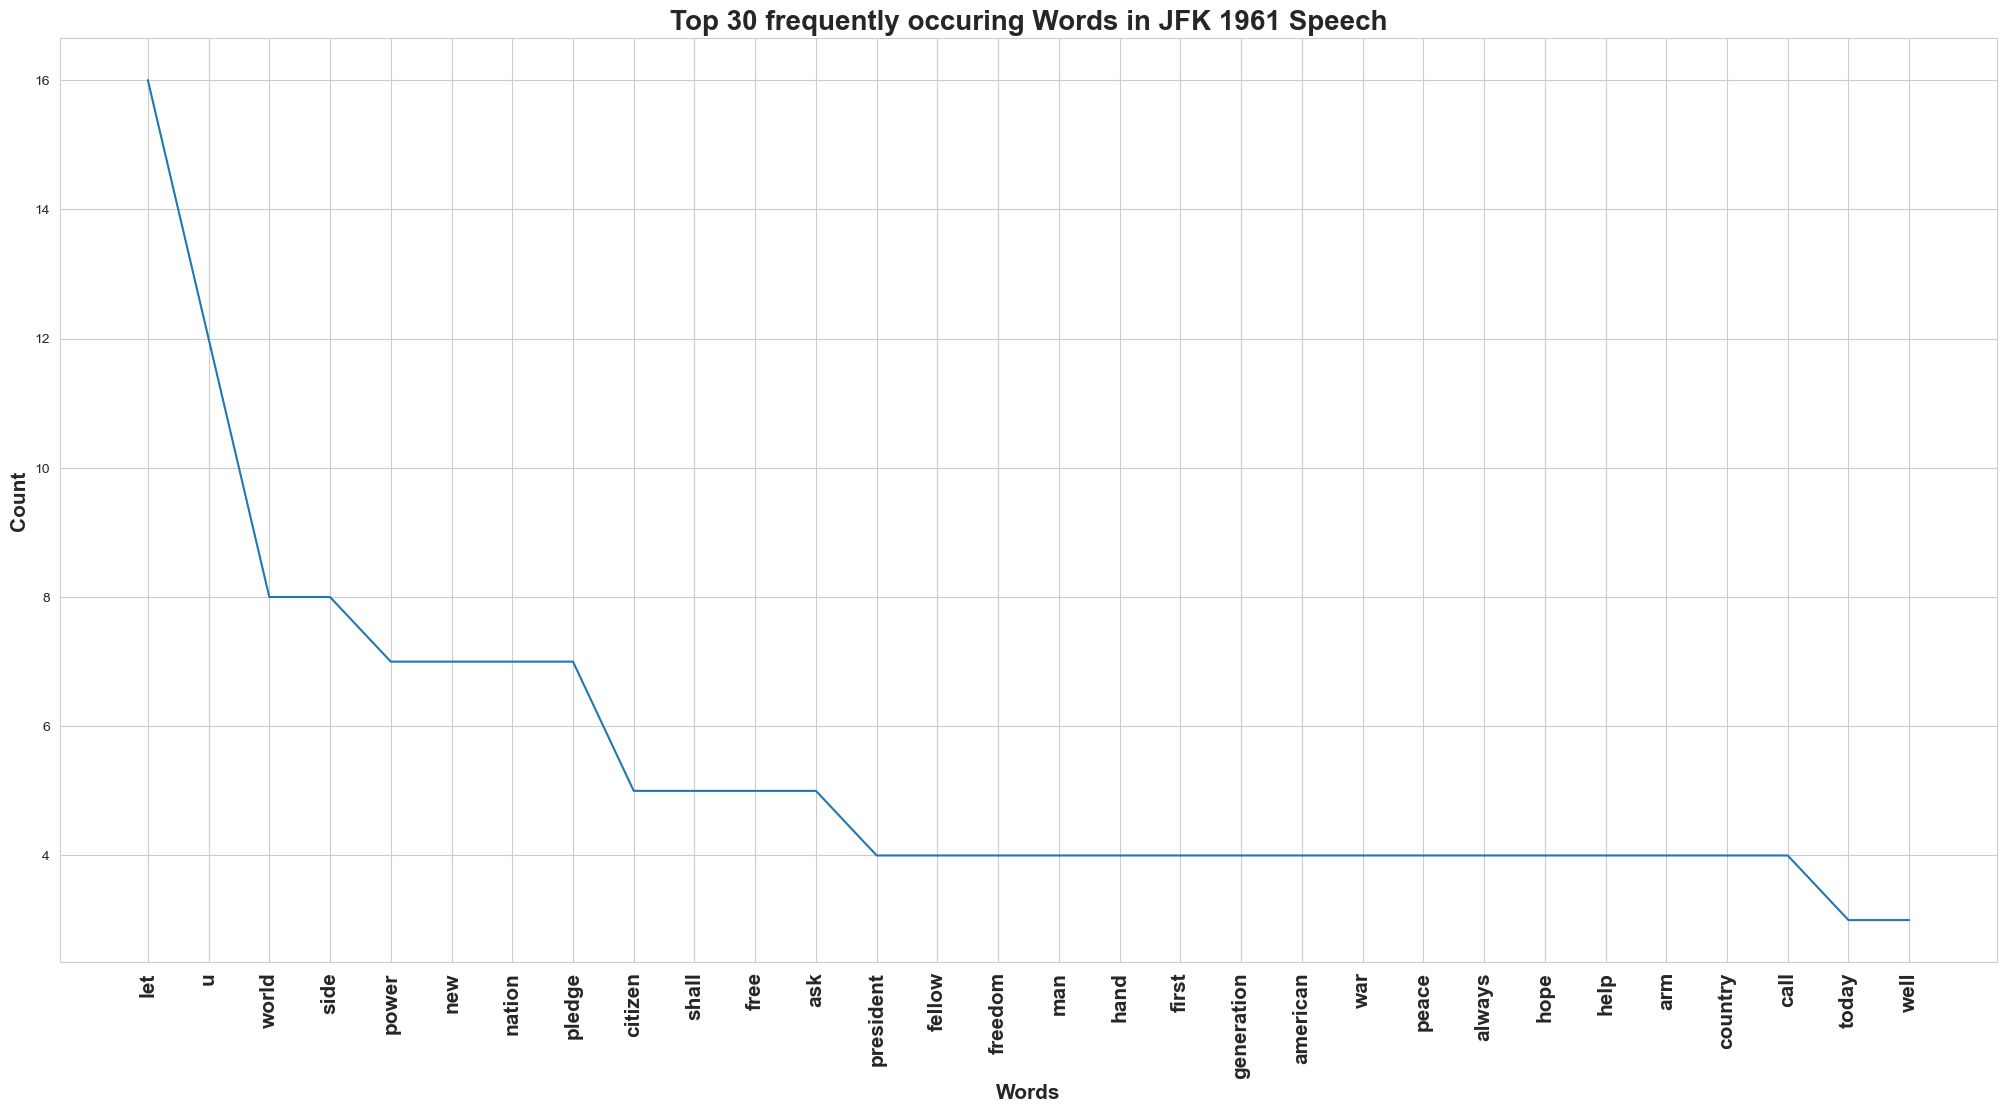

In [587]:
## Plotting the top 30 words occuring frequently
plt.figure(figsize =(25, 12))
plt.title("Top 30 frequently occuring Words in JFK 1961 Speech",fontsize=20, weight="bold")
sns.set_style("whitegrid")
sns.lineplot(data=JFK_30_df,x="Words",y="Count")

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 90,fontsize=15, weight="bold")
plt.xlabel("Words",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");

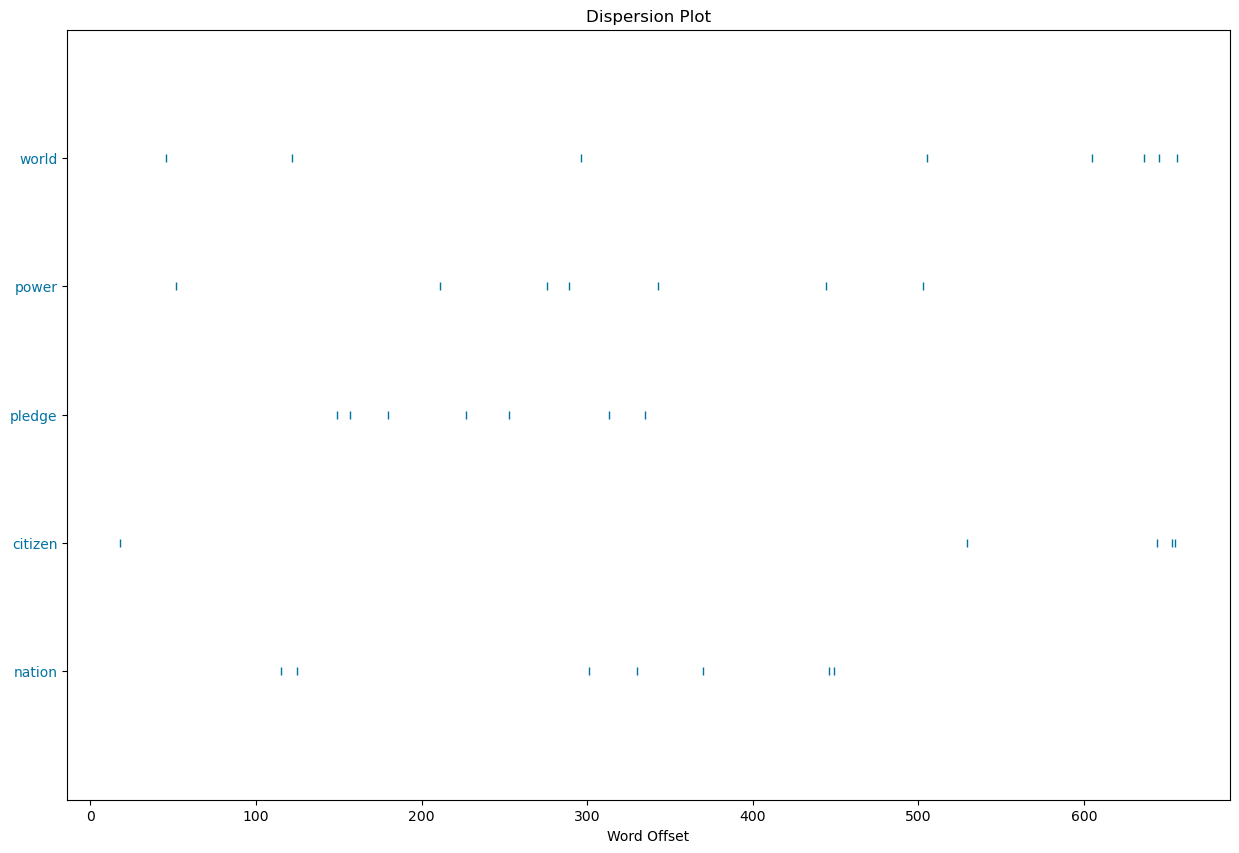

In [588]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
words_used = ["world", "power","pledge", "citizen","nation"]
dispersion_plot(texts2, words_used, ignore_case=True, title='Dispersion Plot')

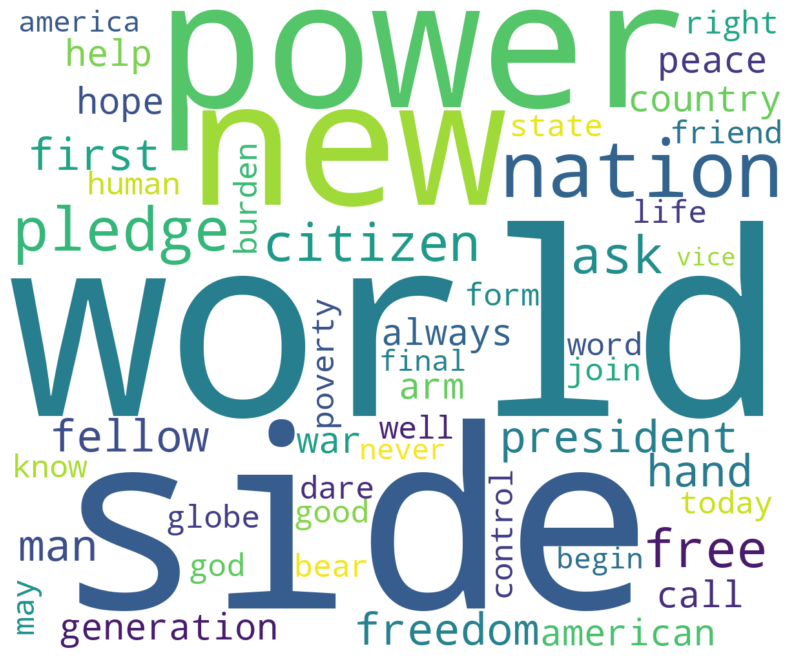

In [589]:
new_words = set(STOPWORDS)
new_words.update(['u','go','let'])

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',max_words=50,
                            width=1200,stopwords=new_words ,
                            height=1000).generate(" ".join(texts2))

# plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Nixon - 1973

In [590]:
# Reading the Text of Nixon - 1973 speech
NIX_1973 = "1973-Nixon.txt"
print(inaugural.raw(NIX_1973))

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

As we meet here today, we stand on the threshold of a new era of peace in the world.

The central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.

This past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendship

In [591]:
## Reading the first 20 words in speech
print(inaugural.words(NIX_1973)[:20])

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower']


In [592]:
no_of_chars_NIX = len(inaugural.raw(NIX_1973))
no_of_words_NIX  = len(inaugural.words(NIX_1973))
no_of_sents_NIX  = len(inaugural.sents(NIX_1973))

In [593]:
#Charecters, Word and Sentences Count
print(f" The number of characters in Nixon speech of 1973 is: {no_of_chars_NIX }")
print(f" The number of words in Nixon speech of 1973 is: {no_of_words_NIX }")
print(f" The number of sentences in Nixon speech of 1973 is: {no_of_sents_NIX }")

speech3 = pd.DataFrame({"NIX_speech" :[no_of_chars_NIX ,no_of_words_NIX ,no_of_sents_NIX ]}, index = ['characters','words','sentences'])

 The number of characters in Nixon speech of 1973 is: 9991
 The number of words in Nixon speech of 1973 is: 2028
 The number of sentences in Nixon speech of 1973 is: 69


In [594]:
speech3

,NIX_speech
characters,9991
words,2028
sentences,69


[Text(0, 5, '9991'), Text(0, 5, '2028'), Text(0, 5, '69')]

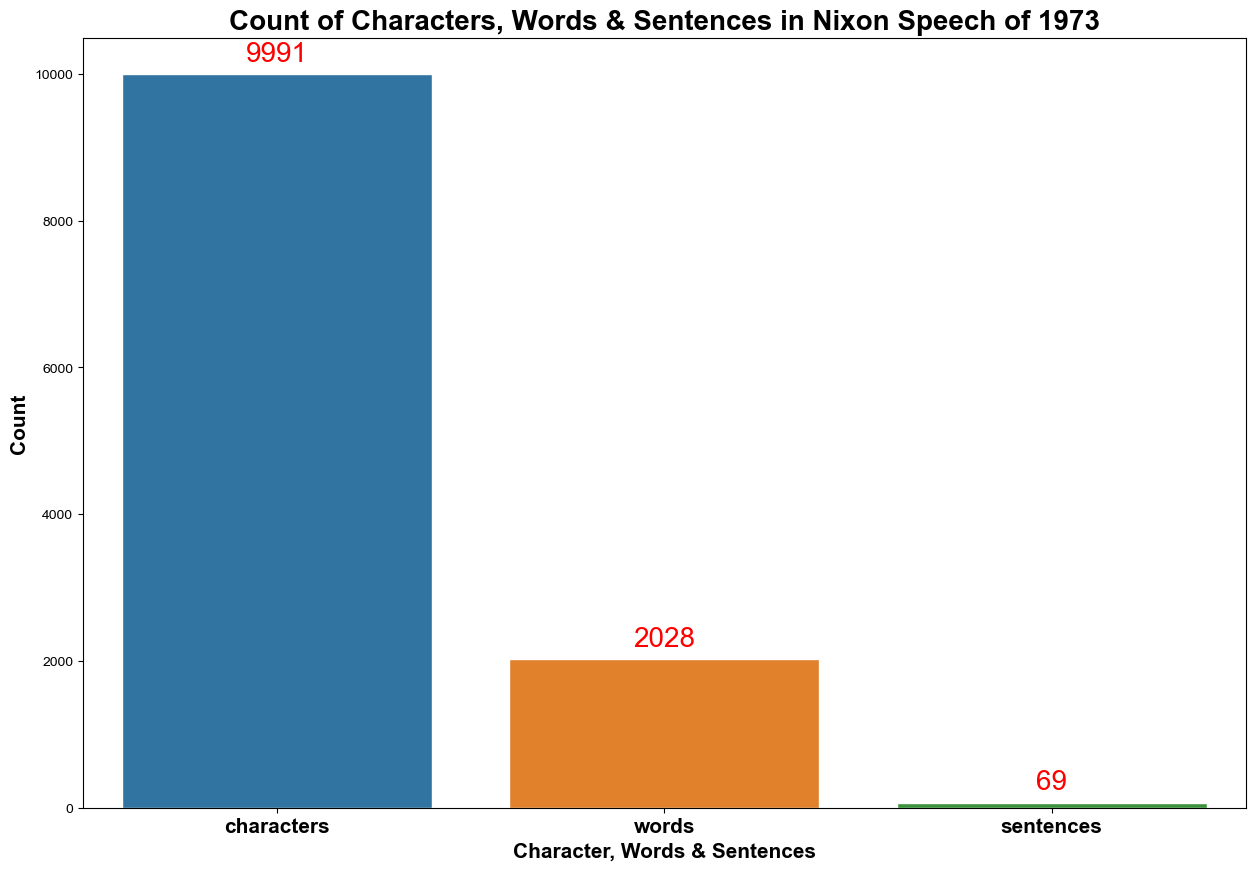

In [595]:
# Visualizing the counts
plt.figure(figsize =(15, 10))
plt.title("Count of Characters, Words & Sentences in Nixon Speech of 1973",fontsize=20, weight="bold")
sns.set_style("whitegrid")
ax=sns.barplot(x =speech3.index, y = 'NIX_speech', data = speech3)

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 0,fontsize=15, weight="bold")
plt.xlabel("Character, Words & Sentences",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 20,padding =5)

In [596]:
## Converting to Lower Case
raw3 = inaugural.raw(NIX_1973).lower()
raw3

'mr. vice president, mr. speaker, mr. chief justice, senator cook, mrs. eisenhower, and my fellow citizens of this great and good country we share together:\n\nwhen we met here four years ago, america was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nas we meet here today, we stand on the threshold of a new era of peace in the world.\n\nthe central question before us is: how shall we use that peace? let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nlet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of america as we enter our third century as a nation.\n\nthis past year saw far-reaching results from our new policies for peace. by continuing to revitalize our traditional

In [597]:
## Cleaning the special characters (/@$: etc)
raw3 = re.sub("[^a-zA-Z]"," ",str(raw3))
raw3

'mr  vice president  mr  speaker  mr  chief justice  senator cook  mrs  eisenhower  and my fellow citizens of this great and good country we share together   when we met here four years ago  america was bleak in spirit  depressed by the prospect of seemingly endless war abroad and of destructive conflict at home   as we meet here today  we stand on the threshold of a new era of peace in the world   the central question before us is  how shall we use that peace  let us resolve that this era we are about to enter will not be what other postwar periods have so often been  a time of retreat and isolation that leads to stagnation at home and invites new danger abroad   let us resolve that this will be what it can become  a time of great responsibilities greatly borne  in which we renew the spirit and the promise of america as we enter our third century as a nation   this past year saw far reaching results from our new policies for peace  by continuing to revitalize our traditional friendshi

In [598]:
## Tokenization -  Splitting the text files into words
tokens3 = nltk.word_tokenize(raw3)
print(tokens3)

['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', 'when', 'we', 'met', 'here', 'four', 'years', 'ago', 'america', 'was', 'bleak', 'in', 'spirit', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', 'as', 'we', 'meet', 'here', 'today', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', 'the', 'central', 'question', 'before', 'us', 'is', 'how', 'shall', 'we', 'use', 'that', 'peace', 'let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that', 'leads', 'to', 'stagnation', 'at', 'home', 'and', 'invites', 'new', 'dan

In [599]:
# Stop words -  Removing words that are not useful or Removing meaningless words 
en_stop3 = stopwords.words('english')
stopped_tokens3 = [i for i in tokens3 if not i in en_stop3]

In [600]:
print(f"Total number of token words are: {len(stopped_tokens3)}")

Total number of token words are: 833


In [601]:
## Stemming Using Lemmatizer -  Stem the words to its root word
lt3 = nltk.WordNetLemmatizer()
texts3 = [lt3.lemmatize(i) for i in stopped_tokens3]

In [602]:
#Charecters, Word and Sentences Count
print(f" The number of words in Nixon speech of 1973 (Before tokenisation) is: {no_of_words_NIX }")
print(f" The number of words in Nixon speech of 1973 (After tokenisation) is: {len(texts3)}")

 The number of words in Nixon speech of 1973 (Before tokenisation) is: 2028
 The number of words in Nixon speech of 1973 (After tokenisation) is: 833


In [603]:
## Reading the first 10 tokenized words in speech
print(texts3[:20])

['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mr', 'eisenhower', 'fellow', 'citizen', 'great', 'good', 'country', 'share', 'together', 'met']


In [604]:
# Top 10 frequency occuring words
NIX_10 = nltk.FreqDist(texts3).most_common(10)
NIX_10

[('u', 26),
 ('let', 22),
 ('america', 21),
 ('peace', 19),
 ('world', 18),
 ('responsibility', 16),
 ('new', 15),
 ('nation', 14),
 ('government', 10),
 ('great', 9)]

In [605]:
nltk.FreqDist(texts3).most_common(30)

[('u', 26),
 ('let', 22),
 ('america', 21),
 ('peace', 19),
 ('world', 18),
 ('responsibility', 16),
 ('new', 15),
 ('nation', 14),
 ('government', 10),
 ('great', 9),
 ('year', 9),
 ('home', 9),
 ('abroad', 8),
 ('together', 7),
 ('shall', 7),
 ('time', 7),
 ('policy', 7),
 ('role', 7),
 ('right', 7),
 ('make', 7),
 ('every', 7),
 ('history', 7),
 ('better', 7),
 ('come', 6),
 ('respect', 6),
 ('people', 6),
 ('help', 6),
 ('four', 5),
 ('war', 5),
 ('today', 5)]

In [606]:
NIX_30_df = pd.DataFrame.from_records(nltk.FreqDist(texts3).most_common(30),columns=["Words", "Count"])
NIX_30_df

,Words,Count
0,u,26
1,let,22
2,america,21
3,peace,19
4,world,18
5,responsibility,16
6,new,15
7,nation,14
8,government,10
9,great,9


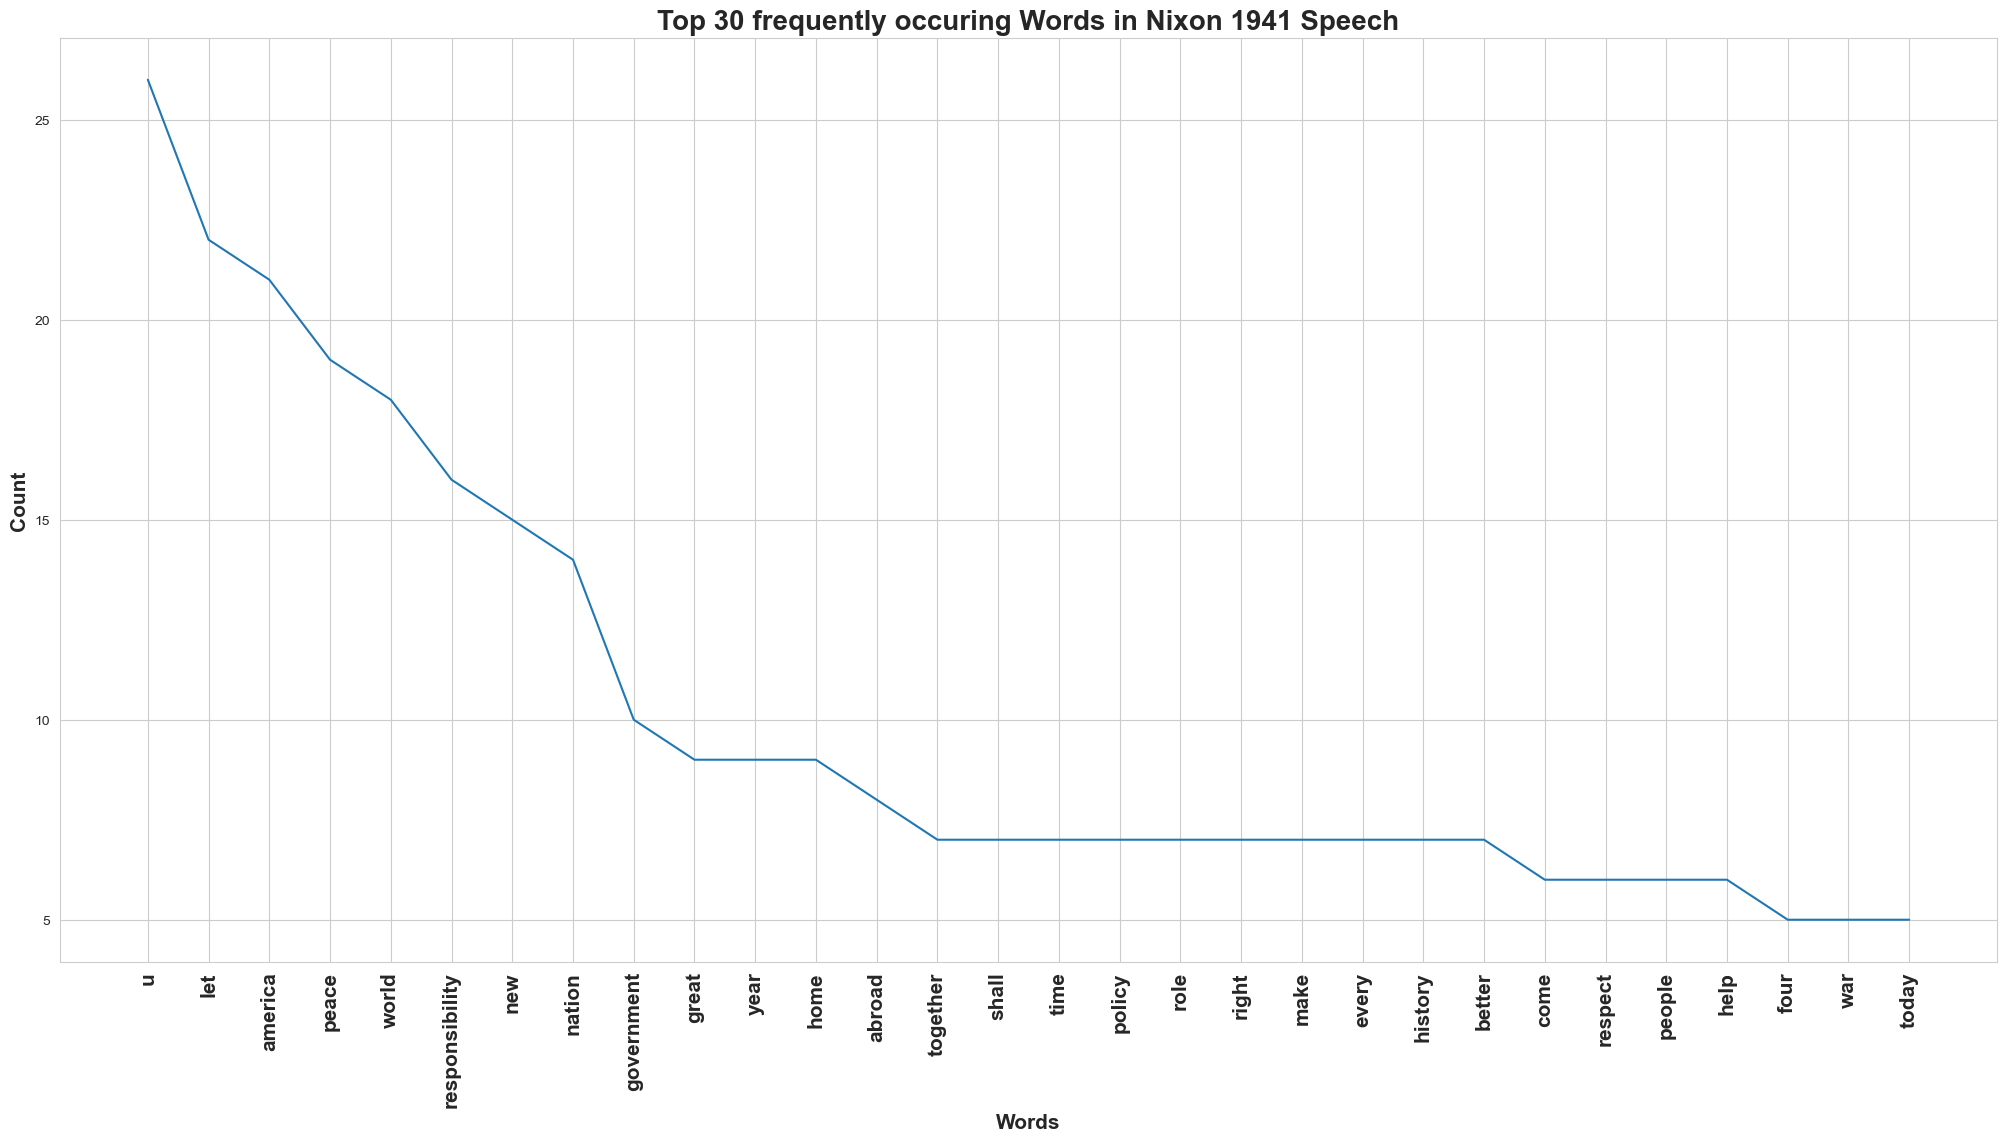

In [607]:
## Plotting the top 30 words occuring frequently
plt.figure(figsize =(25, 12))
# sns.set_style("whitegrid)")
plt.title("Top 30 frequently occuring Words in Nixon 1941 Speech",fontsize=20, weight="bold")
sns.lineplot(data=NIX_30_df,x="Words",y="Count")

#Label the axes and rotate the label of the categories so that it is readable 
plt.xticks(rotation = 90,fontsize=15, weight="bold")
plt.xlabel("Words",fontsize=15, weight="bold");
plt.ylabel("Count",fontsize=15, weight="bold");

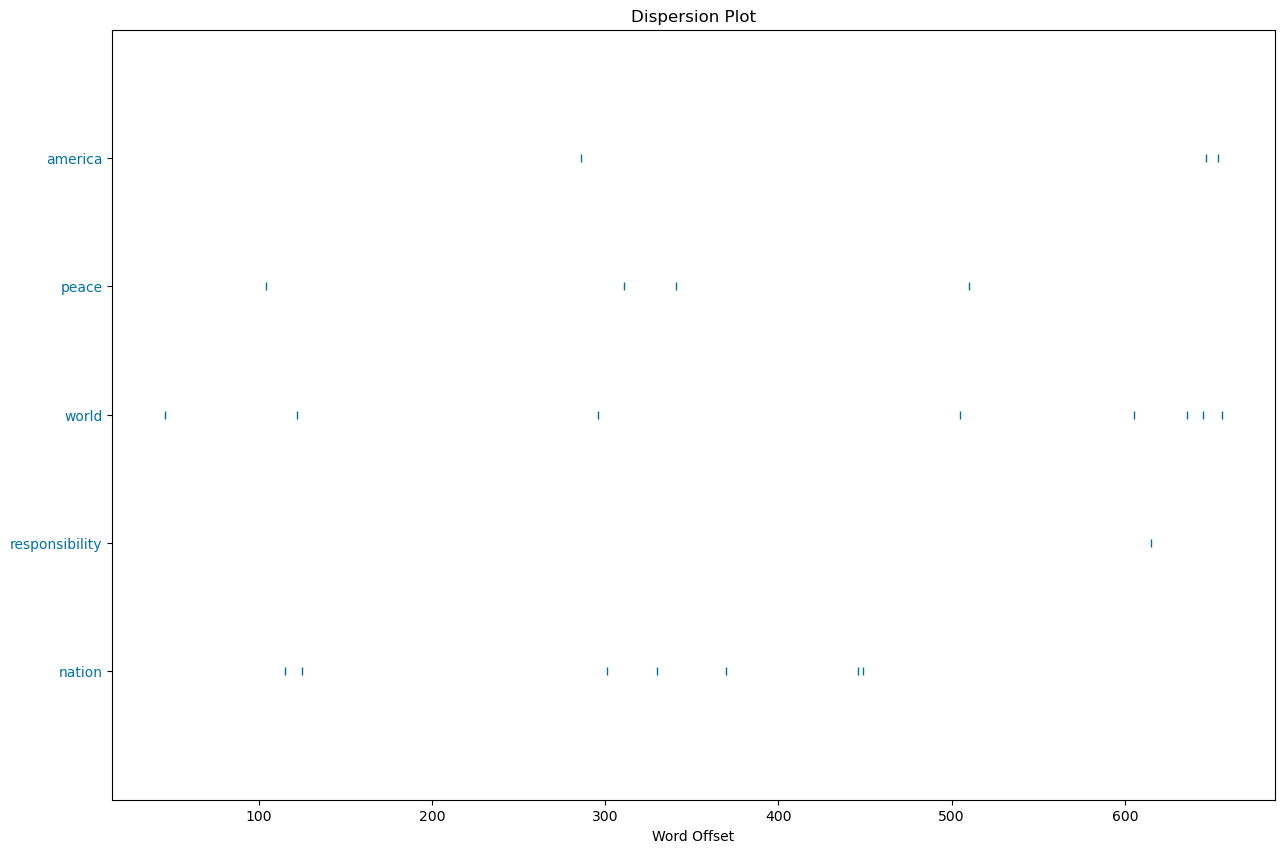

In [608]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
words_used = ["america", "peace","world", "responsibility","nation"]
dispersion_plot(texts2, words_used, ignore_case=True, title='Dispersion Plot')

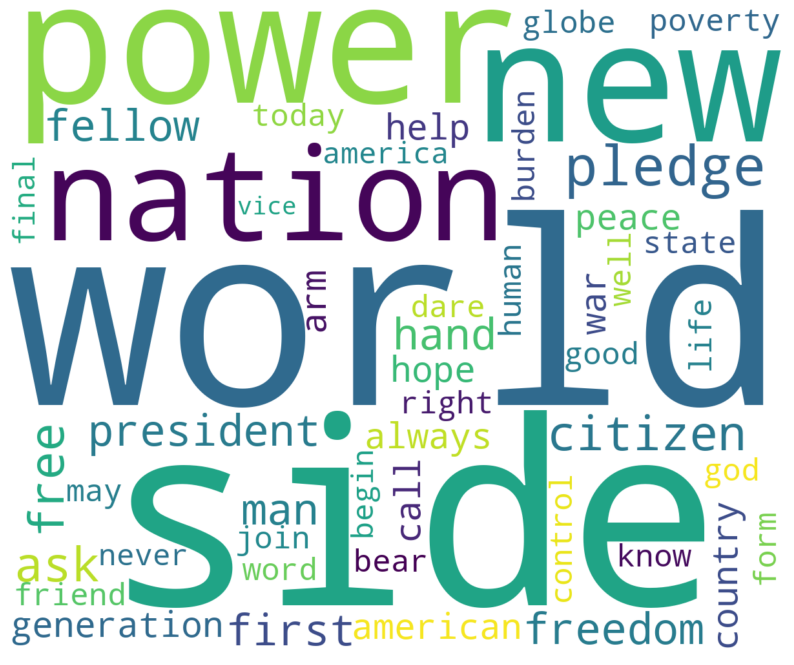

In [609]:
new_words = set(STOPWORDS)
new_words.update(['u','go','let'])

plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',max_words=50,
                            width=1200,stopwords=new_words ,
                            height=1000).generate(" ".join(texts2))

# plt.title("MOST USED WORDS",fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()